# **Project 3: Sleep Analytics**

**Project Overview**

  * This project aims to create a personalized sleep health coaching tool using data science techniques. By analyzing individual sleep patterns and academic performance, the tool will provide tailored recommendations to help students optimize their sleep habits and improve their academic outcomes.

**Key Objectives:**

  * Categorize students based on sleep patterns and academic performance.
  * Generate personalized sleep recommendations based on identified categories.
  * Validate the effectiveness of recommendations in improving sleep quality and academic performance.

**Dataset:**
  * The dataset comprises 634 participants who wore Fitbits to track their sleep and physical activity. Students' GPAs were obtained from the university registrar. Each row represents a single participant.

**Sleep Data:**
  * Fitbit data was used to extract sleep "episodes" lasting at least 20 minutes, separated by at least 5 minutes. Gaps shorter than 5 minutes were ignored. The longest episode between noon of one day and noon of the next was considered the "main" episode, with anything else classified as "daytime sleep."

**Academic Data:**
  * GPAs were collected from the university registrar.

**Methodology:**

  * **Data Collection:** Gather data on students' sleep habits, academic performance, and relevant demographics.
  * **Data Preprocessing:** Clean and prepare the data for analysis, handling missing values and outliers.
  * **Clustering:** Employ clustering techniques to identify distinct student profiles based on their sleep and academic characteristics.
  * **Recommendation Generation:** Develop a model to generate personalized recommendations based on the identified clusters and key factors influencing sleep and academic performance.
  * **Evaluation:** Assess the effectiveness of the recommendations through metrics such as user satisfaction, changes in sleep quality, and improvements in academic performance.

**Expected Outcomes:**

  * **Student Profiles:** Identification of distinct groups of students with unique sleep and academic needs.
  * **Personalized Recommendations:** Tailored advice to optimize sleep habits and improve academic outcomes.
  * **Positive Impact:** Measurable improvements in students' sleep quality and academic performance.

**Challenges and Considerations:**

  * **Data Quality:** Ensuring the accuracy and completeness of sleep and academic data.
  * **Privacy:** Protecting students' personal information and ensuring responsible data usage.
  * **Recommendation Effectiveness:** Validating the effectiveness of the recommendations through rigorous evaluation.

**Future Directions:**

  * **Expand Data:** Incorporate additional data points (e.g., stress levels, exercise habits) for more comprehensive recommendations.
  * **Longitudinal Studies:** Conduct longitudinal studies to track the long-term impact of the recommendations.
  * **Integration with Other Tools:** Integrate the sleep coach with other academic tools or platforms for seamless user experience.
  * **Continuous Improvement:** Continuously refine the model and recommendations based on user feedback and evolving research.


# **1. Data Pre-processing**

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_csv('cmu-sleep.csv')

# Confirm dataset is loaded
df.head()

subject_id  study cohort demo_race demo_gender demo_firstgen  bedtime_mssd  \
0         185      5   lac1         1           1             0      0.116727   
1         158      5   lac1         0           1             0      0.141681   
2         209      5   lac1         1           1             0      1.529289   
3         102      5   lac1         0           1             1      0.130148   
4         174      5   lac1         1           1             0      0.130181   

   TotalSleepTime  midpoint_sleep  frac_nights_with_data  daytime_sleep  \
0      432.200000      458.660000               0.862069      24.160000   
1      391.931035      364.465517               1.000000      13.137931   
2      344.304348      560.891304               0.793103      14.956522   
3      392.620690      416.482759               1.000000      54.551724   
4      423.421053      368.763158               0.655172      10.526316   

   cum_gpa  term_gpa term_units Zterm_units_ZofZ  
0     3.00      3.38         73      4.055294859  
1     3.66      2.60         64      2.482534122  
2     3.57      3.07         63       2.30778293  
3     3.61      3.56         61      1.958280544  
4     3.21      4.00         61      1.958280544

In [ ]:
# Confirm dataset details

print(f'\nDataset Info: \n {df.info()}')
print(f'\nSummary Statistics: \n {df.describe()}')
print(f'\nUnqiue Values: \n {df.nunique()}')
print(f'\nRows and Cols: \n {df.shape}')
print(f'\n Column Names: \n {df.columns}')
print(f'\n Data Types: \n {df.dtypes}')
print(f'\n Missing Values: \n {df.isnull().sum()}')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   subject_id             634 non-null    int64  
 1   study                  634 non-null    int64  
 2   cohort                 634 non-null    object 
 3   demo_race              634 non-null    object 
 4   demo_gender            634 non-null    object 
 5   demo_firstgen          634 non-null    object 
 6   bedtime_mssd           634 non-null    float64
 7   TotalSleepTime         634 non-null    float64
 8   midpoint_sleep         634 non-null    float64
 9   frac_nights_with_data  634 non-null    float64
 10  daytime_sleep          634 non-null    float64
 11  cum_gpa                634 non-null    float64
 12  term_gpa               634 non-null    float64
 13  term_units             634 non-null    object 
 14  Zterm_units_ZofZ       634 non-null    object 
dtypes: flo

In [ ]:
# Confirm categorical variables
df.select_dtypes(include=['object']).info()
print(f'\nCohort: \n{df["cohort"].value_counts()}')
print(f'\nGender: \n{df["demo_gender"].value_counts()}')
print(f'\nRace: \n{df["demo_race"].value_counts()}')
print(f'\nFirstGen: \n{df["demo_firstgen"].value_counts()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   cohort            634 non-null    object
 1   demo_race         634 non-null    object
 2   demo_gender       634 non-null    object
 3   demo_firstgen     634 non-null    object
 4   term_units        634 non-null    object
 5   Zterm_units_ZofZ  634 non-null    object
dtypes: object(6)
memory usage: 29.8+ KB

Cohort: 
cohort
nh      147
uw1     140
uw2     139
lac1    131
lac2     77
Name: count, dtype: int64

Gender: 
demo_gender
1    368
0    263
       3
Name: count, dtype: int64

Race: 
demo_race
1    514
0    119
       1
Name: count, dtype: int64

FirstGen: 
demo_firstgen
0    526
1    103
       4
2      1
Name: count, dtype: int64


In [ ]:
# Change Term units and Z Term Units of Z to numerical
# Replace empty strings or spaces with NaN

df['term_units'] = df['term_units'].replace(' ', np.nan)
df['Zterm_units_ZofZ'] = df['Zterm_units_ZofZ'].replace(' ', np.nan)

# Convert the column to float

df['term_units'] = df['term_units'].astype(float)
df['Zterm_units_ZofZ'] = df['Zterm_units_ZofZ'].astype(float)

# Confirm numerical variables

df.select_dtypes(include=['int64', 'float64']).info()
df.select_dtypes(include=['int64', 'float64']).describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   subject_id             634 non-null    int64  
 1   study                  634 non-null    int64  
 2   bedtime_mssd           634 non-null    float64
 3   TotalSleepTime         634 non-null    float64
 4   midpoint_sleep         634 non-null    float64
 5   frac_nights_with_data  634 non-null    float64
 6   daytime_sleep          634 non-null    float64
 7   cum_gpa                634 non-null    float64
 8   term_gpa               634 non-null    float64
 9   term_units             487 non-null    float64
 10  Zterm_units_ZofZ       487 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 54.6 KB


count          mean           std         min  \
subject_id             634.0  1.300589e+04  26496.593477    1.000000   
study                  634.0  3.181388e+00      1.317125    1.000000   
bedtime_mssd           634.0  4.516879e-01      1.393632    0.004505   
TotalSleepTime         634.0  3.973239e+02     50.856725  194.782609   
midpoint_sleep         634.0  3.986792e+02     72.710945  247.071429   
frac_nights_with_data  634.0  8.674389e-01      0.178960    0.214286   
daytime_sleep          634.0  4.116424e+01     27.389418    2.269231   
cum_gpa                634.0  3.465596e+00      0.437577    1.210000   
term_gpa               634.0  3.449598e+00      0.500467    0.350000   
term_units             487.0  2.939220e+01     17.642780    5.000000   
Zterm_units_ZofZ       487.0  1.437371e-11      1.000000   -3.982521   

                              25%         50%         75%           max  
subject_id             178.000000  358.500000  592.750000  99978.000000  
study                    2.000000    3.000000    4.000000      5.000000  
bedtime_mssd             0.074694    0.135007    0.291698     20.849225  
TotalSleepTime         366.930077  400.395833  430.114583    587.666667  
midpoint_sleep         345.182692  388.245726  437.655263    724.666667  
frac_nights_with_data    0.821429    0.932184    1.000000      1.000000  
daytime_sleep           23.097826   34.982143   51.248538    292.304348  
cum_gpa                  3.232283    3.557833    3.789545      4.000000  
term_gpa                 3.233333    3.555667    3.810000      4.000000  
term_units              15.000000   17.000000   48.000000     73.000000  
Zterm_units_ZofZ        -0.551042    0.041207    0.560271      4.055295

# **2. Exploratory Data Analysis**
## **Priority List**

### **1. Univariate Analysis**

**Categorical Variables:**
  * Analyze the distribution of categorical variables (e.g., demo_race, demo_gender, demo_firstgen, cohort) using frequency tables, bar charts, or pie charts.
  * Identify any imbalances or dominant categories.

**Numerical Variables:**
  * Examine the distribution of numerical variables (e.g., bedtime_mssd, TotalSleepTime, midpoint_sleep, frac_nights_with_data) using histograms, box plots, and summary statistics.
  * Identify outliers, skewness, and kurtosis.

### **2. Bivariate Analysis**

**Categorical-Categorical:**
  * Analyze the relationship between categorical variables using cross-tabulation and chi-square tests.
  * For example, examine the relationship between demo_race and demo_gender.

**Numerical-Numerical:**
  * Calculate correlation coefficients between numerical variables to identify potential relationships.
  * For example, assess the correlation between bedtime_mssd and TotalSleepTime.

**Categorical-Numerical:**
  * Explore the relationship between categorical and numerical variables using group statistics, box plots, or ANOVA.
  * For example, compare the average TotalSleepTime across different demo_gender categories.

### **3. Multivariate Analysis**
  * **Dimensionality Reduction:** Consider techniques like Principal Component Analysis (PCA) or t-SNE to reduce the dimensionality of the dataset and identify underlying patterns.
  * **Clustering:** Explore clustering algorithms (e.g., K-means, hierarchical clustering) to group similar participants based on their characteristics.
  * **Regression Analysis:** Use regression models to predict target variables (e.g., term_gpa) based on other variables.

### **4. Data Cleaning and Preprocessing**
  * **Handle Outliers:** Identify and address outliers in numerical variables using techniques like Winsorization or trimming.
  * **Impute Missing Values:** If there are any missing values (which are not present in the provided data), consider imputation methods like mean/median imputation or more advanced techniques.
  * **Feature Engineering:** Create new features or transform existing ones to capture more relevant information. For example, you could create a feature for the difference between bedtime and wake_up_time.

### **5. Exploratory Analysis Based on Domain Knowledge**
  * Leverage your understanding of sleep patterns, academic performance, and other relevant factors to guide your EDA.
  * For example, explore the relationship between daytime_sleep and term_gpa to understand the impact of daytime napping on academic performance.

## **Univariate Analysis**
### **Categorical Variables**


Gender: 
demo_gender
1    368
0    263
       3
Name: count, dtype: int64

Gender: 
demo_gender
1    58.044164
0    41.482650
      0.473186
Name: proportion, dtype: float64


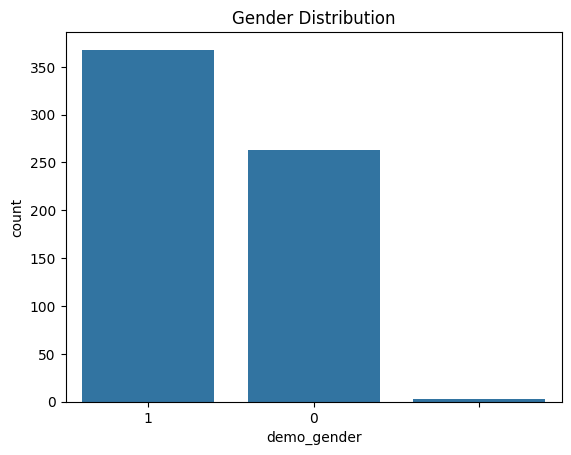


FirstGen: 
demo_firstgen
0    526
1    103
       4
2      1
Name: count, dtype: int64

FirstGen: 
demo_firstgen
0    82.965300
1    16.246057
      0.630915
2     0.157729
Name: proportion, dtype: float64


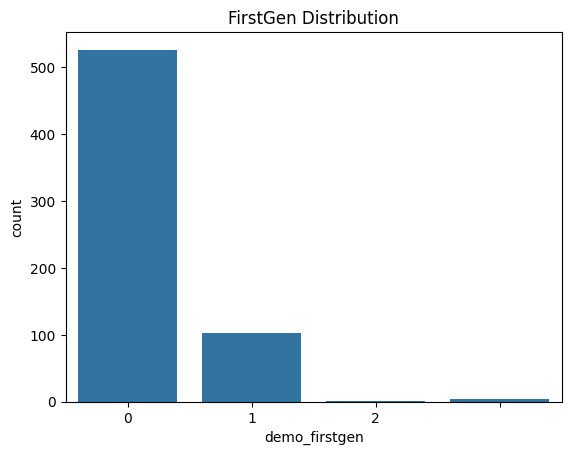


Race: 
demo_race
1    514
0    119
       1
Name: count, dtype: int64

Race: 
demo_race
1    81.072555
0    18.769716
      0.157729
Name: proportion, dtype: float64


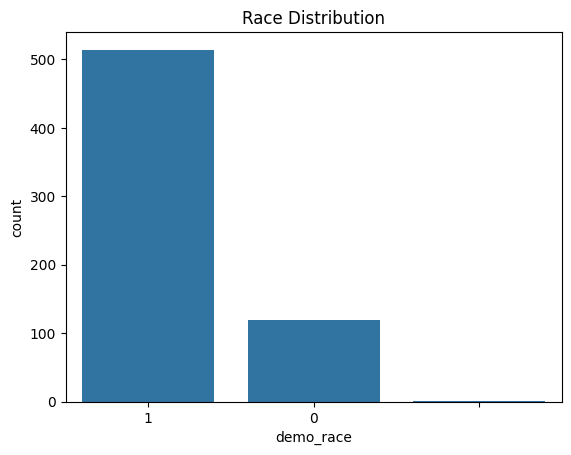


Cohort: 
cohort
nh      147
uw1     140
uw2     139
lac1    131
lac2     77
Name: count, dtype: int64

Cohort: 
cohort
nh      23.186120
uw1     22.082019
uw2     21.924290
lac1    20.662461
lac2    12.145110
Name: proportion, dtype: float64


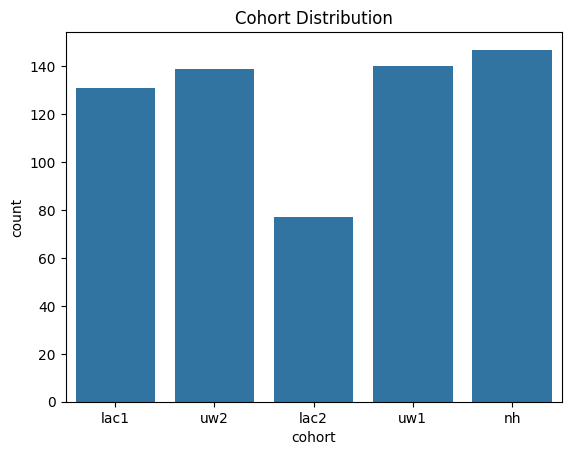

In [ ]:
# Univariate Analysis
# Categorical Variables: Analyze the distribution of categorical variables (demo_gender, demo_race, demo_firstgen, cohort, term_units, ) using freq tables and charts
# There are missing and inaccurate values for each variable that need to be removed before conducting further analysis

# Gender
print(f'\nGender: \n{df["demo_gender"].value_counts()}')
print(f'\nGender: \n{df["demo_gender"].value_counts(normalize=True)*100}')
sns.countplot(x='demo_gender', data=df)
plt.title('Gender Distribution')
plt.show()

# FirstGen
print(f'\nFirstGen: \n{df["demo_firstgen"].value_counts()}')
print(f'\nFirstGen: \n{df["demo_firstgen"].value_counts(normalize=True)*100}')
sns.countplot(x='demo_firstgen', data=df)
plt.title('FirstGen Distribution')
plt.show()

# Race
print(f'\nRace: \n{df["demo_race"].value_counts()}')
print(f'\nRace: \n{df["demo_race"].value_counts(normalize=True)*100}')
sns.countplot(x='demo_race', data=df)
plt.title('Race Distribution')
plt.show()

# Cohort
print(f'\nCohort: \n{df["cohort"].value_counts()}')
print(f'\nCohort: \n{df["cohort"].value_counts(normalize=True)*100}')
sns.countplot(x='cohort', data=df)
plt.title('Cohort Distribution')
plt.show()



Gender: 
demo_gender
1    364
0    261
Name: count, dtype: int64

Gender: 
demo_gender
1    58.24
0    41.76
Name: proportion, dtype: float64


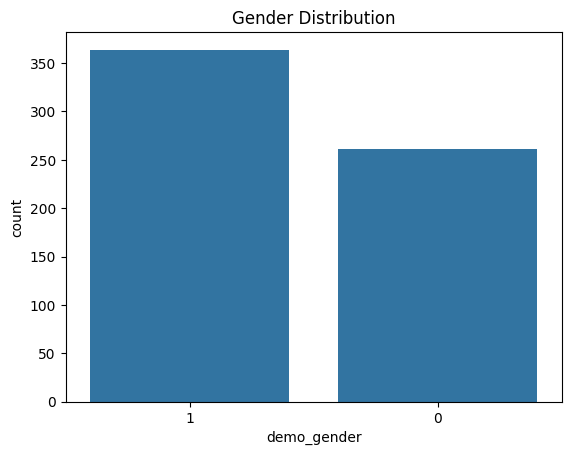


FirstGen: 
demo_firstgen
0    522
1    103
Name: count, dtype: int64

FirstGen: 
demo_firstgen
0    83.52
1    16.48
Name: proportion, dtype: float64


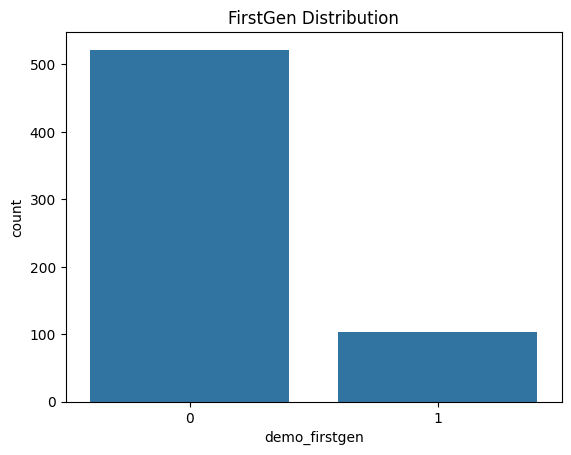


Race: 
demo_race
1    507
0    118
Name: count, dtype: int64

Race: 
demo_race
1    81.12
0    18.88
Name: proportion, dtype: float64


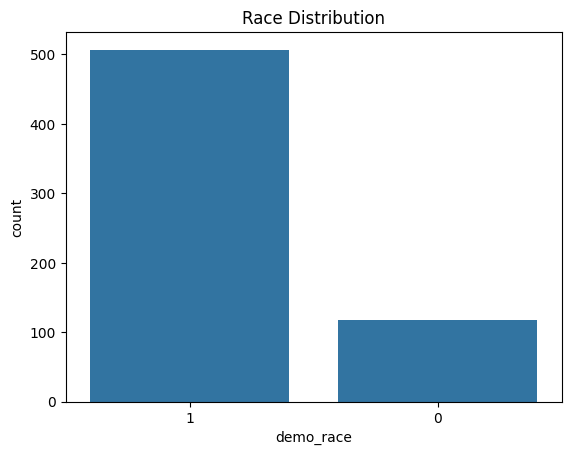

In [ ]:
# Remove missing and inaccurate information from categorical variables
df = df.dropna(subset=['demo_gender', 'demo_firstgen', 'demo_race'])
df = df[df['demo_gender'].isin(['0', '1'])]
df = df[df['demo_firstgen'].isin(['0', '1'])]
df = df[df['demo_race'].isin(['0', '1'])]

# Gender
print(f'\nGender: \n{df["demo_gender"].value_counts()}')
print(f'\nGender: \n{df["demo_gender"].value_counts(normalize=True)*100}')
sns.countplot(x='demo_gender', data=df)
plt.title('Gender Distribution')
plt.show()

# FirstGen
print(f'\nFirstGen: \n{df["demo_firstgen"].value_counts()}')
print(f'\nFirstGen: \n{df["demo_firstgen"].value_counts(normalize=True)*100}')
sns.countplot(x='demo_firstgen', data=df)
plt.title('FirstGen Distribution')
plt.show()

# Race
print(f'\nRace: \n{df["demo_race"].value_counts()}')
print(f'\nRace: \n{df["demo_race"].value_counts(normalize=True)*100}')
sns.countplot(x='demo_race', data=df)
plt.title('Race Distribution')
plt.show()

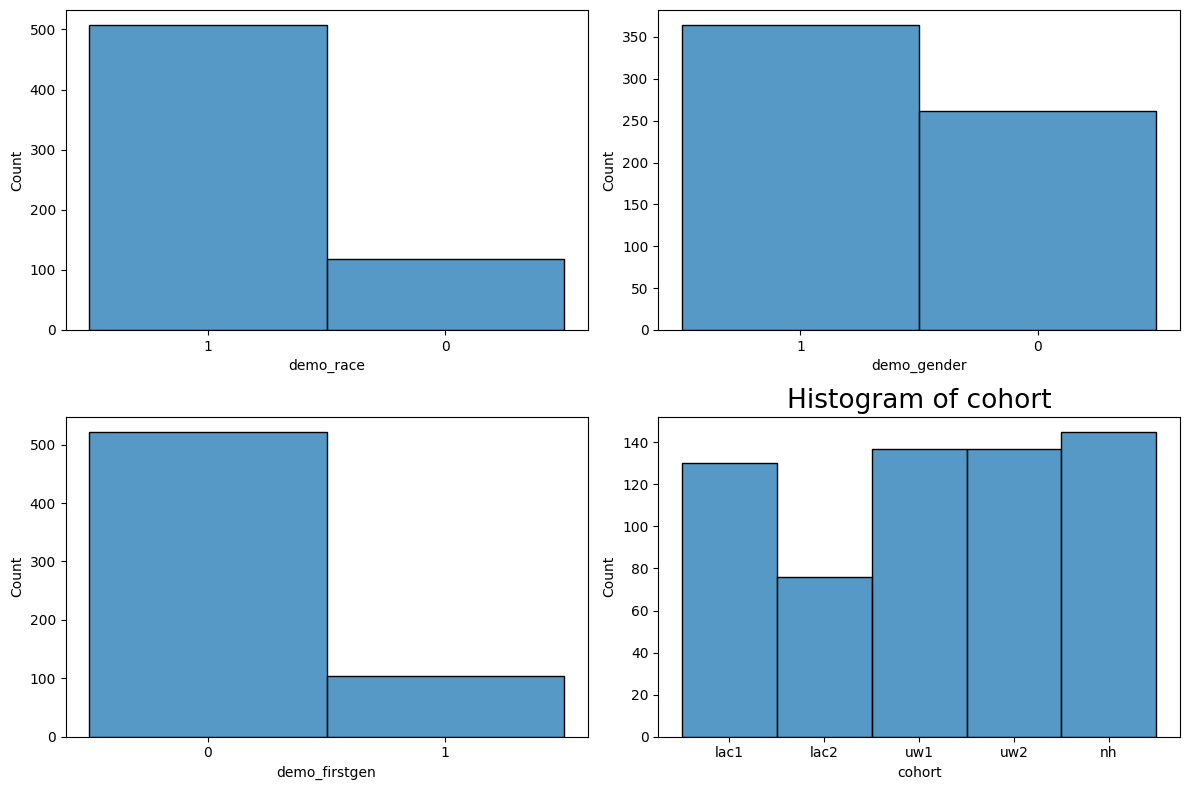

In [ ]:
# Explore distributions of each categorical column (demo_gender, demo_race, demo_firstgen, cohort)

# Create histogram for each categorical variable

categorical_columns = ['demo_race', 'demo_gender', 'demo_firstgen', 'cohort']
num_rows = 2  # Number of rows for the subplots
num_cols = 2  # Number of columns for the subplots

# Create a figure with subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 8))

# Loop through categorical variables and create histograms on subplots
col_counter = 0
row_counter = 0
for column in categorical_columns:
    ax = axes[row_counter, col_counter]  # Access the current subplot
    sns.histplot(df[column], bins=len(df[column].unique()), ax=ax)
    plt.title(f'Histogram of {column}', fontsize=19)
    plt.xlabel(column, fontsize=10)
    plt.ylabel('Count', fontsize=10)
    col_counter += 1
    if col_counter == num_cols:
        col_counter = 0
        row_counter += 1

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


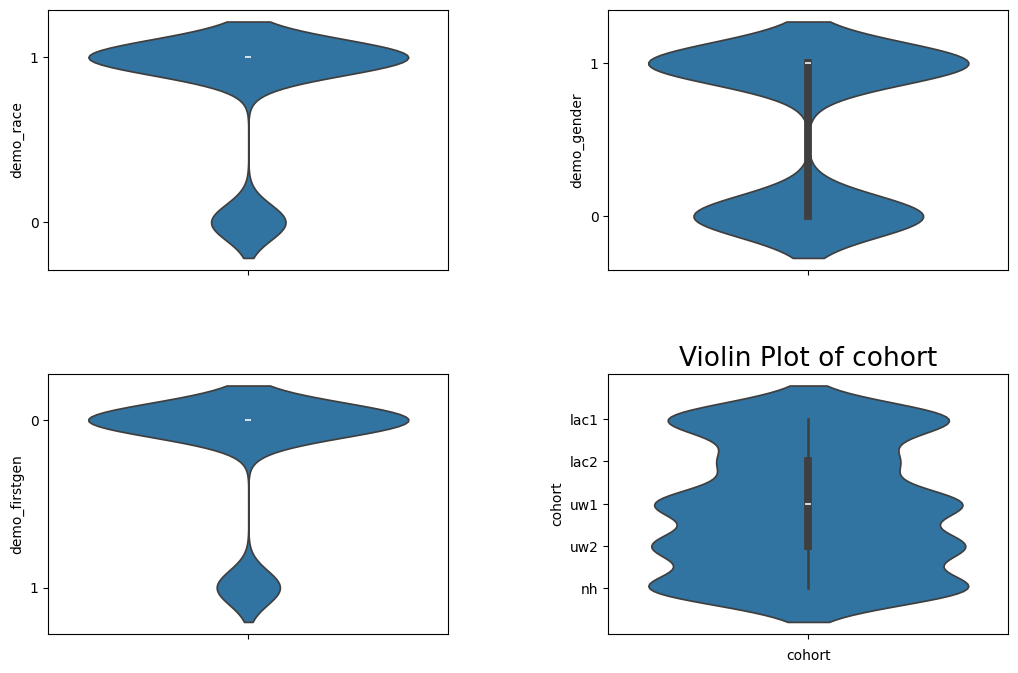

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List categorical variables
categorical_columns = ['demo_race', 'demo_gender', 'demo_firstgen', 'cohort']
num_rows = 2  # Number of rows for the subplots
num_cols = 2  # Number of columns for the subplots

# Create a figure with subplots and adjust spacing
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 8))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.88, wspace=0.4, hspace=0.4)  # Adjust margins and spacing

# Loop through categorical variables and create violin plots on subplots
col_counter = 0
row_counter = 0
for column in categorical_columns:
    ax = axes[row_counter, col_counter]  # Access the current subplot
    sns.violinplot(y=df[column], ax=ax)  # Specify x and y for violin plot
    plt.title(f'Violin Plot of {column}', fontsize=19)  # Adjust font size for clarity
    plt.xlabel(column, fontsize=10)
    col_counter += 1
    if col_counter == num_cols:
        col_counter = 0
        row_counter += 1

# Show the plot
plt.show()

## **Univariate Analysis**
### **Numerical Variables**


BEDTIME_MSSD: 
count    625.000000
mean       0.453496
std        1.401705
min        0.004505
25%        0.074576
50%        0.135441
75%        0.292522
max       20.849225
Name: bedtime_mssd, dtype: float64

TOTALSLEEPTIME: 
count    625.000000
mean     397.365275
std       50.805263
min      194.782609
25%      366.758621
50%      400.541667
75%      430.125000
max      587.666667
Name: TotalSleepTime, dtype: float64

MIDPOINT_SLEEP: 
count    625.000000
mean     398.702578
std       72.830123
min      247.071429
25%      345.730769
50%      387.086207
75%      437.733333
max      724.666667
Name: midpoint_sleep, dtype: float64

FRAC_NIGHTS_WITH_DATA: 
count    625.000000
mean       0.867244
std        0.179240
min        0.214286
25%        0.821429
50%        0.933333
75%        1.000000
max        1.000000
Name: frac_nights_with_data, dtype: float64

DAYTIME_SLEEP: 
count    625.000000
mean      41.276384
std       27.402524
min        2.269231
25%       23.130435
50%       35.

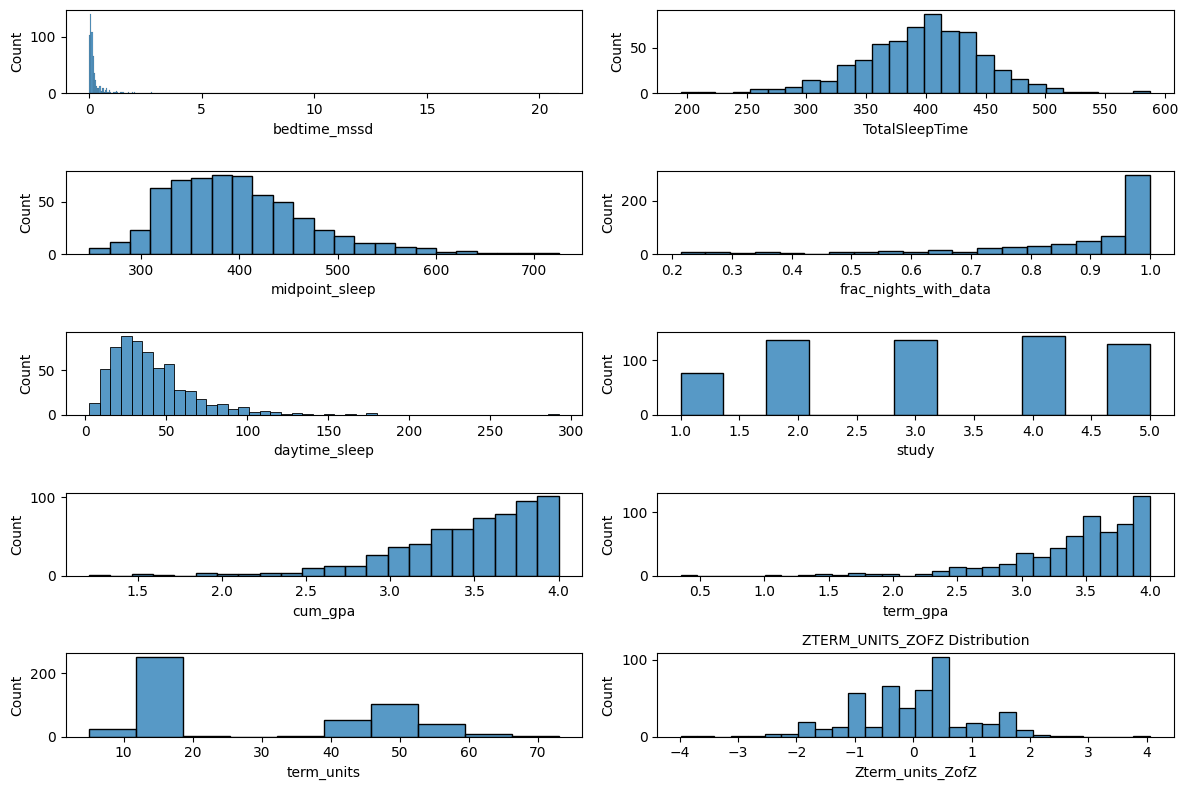

In [ ]:
# Numerical Variables
# Examine the distribution of numerical variables (e.g., bedtime_mssd, TotalSleepTime, midpoint_sleep, frac_nights_with_data, study, daytime_sleep, cum_gpa, term_gpa) using histograms, box plots, and summary statistics.
# Identify outliers, skewness, and kurtosis.

# List of variables to analyze
variables = ['bedtime_mssd', 'TotalSleepTime', 'midpoint_sleep', 'frac_nights_with_data', 'daytime_sleep', 'study', 'cum_gpa',
             'term_gpa', 'term_units', 'Zterm_units_ZofZ']
num_rows = 5  # Number of rows for the subplots
num_cols = 2  # Number of columns for the subplots

# Create a figure with subplots and adjust spacing
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 8))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.88, wspace=0.4, hspace=0.4)  # Adjust margins and spacing

# Loop through variables and create histograms on subplots
row_counter = 0
col_counter = 0
for var in variables:
    ax = axes[row_counter, col_counter]  # Access the current subplot

    # Print descriptive statistics
    print(f'\n{var.upper()}: \n{df[var].describe()}')

    # Create histogram
    sns.histplot(df[var], ax=ax)

    # Set title and labels
    plt.title(f'{var.upper()} Distribution', fontsize=10)
    plt.xlabel(var, fontsize=10)
    plt.ylabel('Count', fontsize=10)

    # Update counters and handle overflow
    col_counter += 1
    if col_counter == num_cols:
        col_counter = 0
        row_counter += 1

plt.tight_layout()

# Show the plot
plt.show()

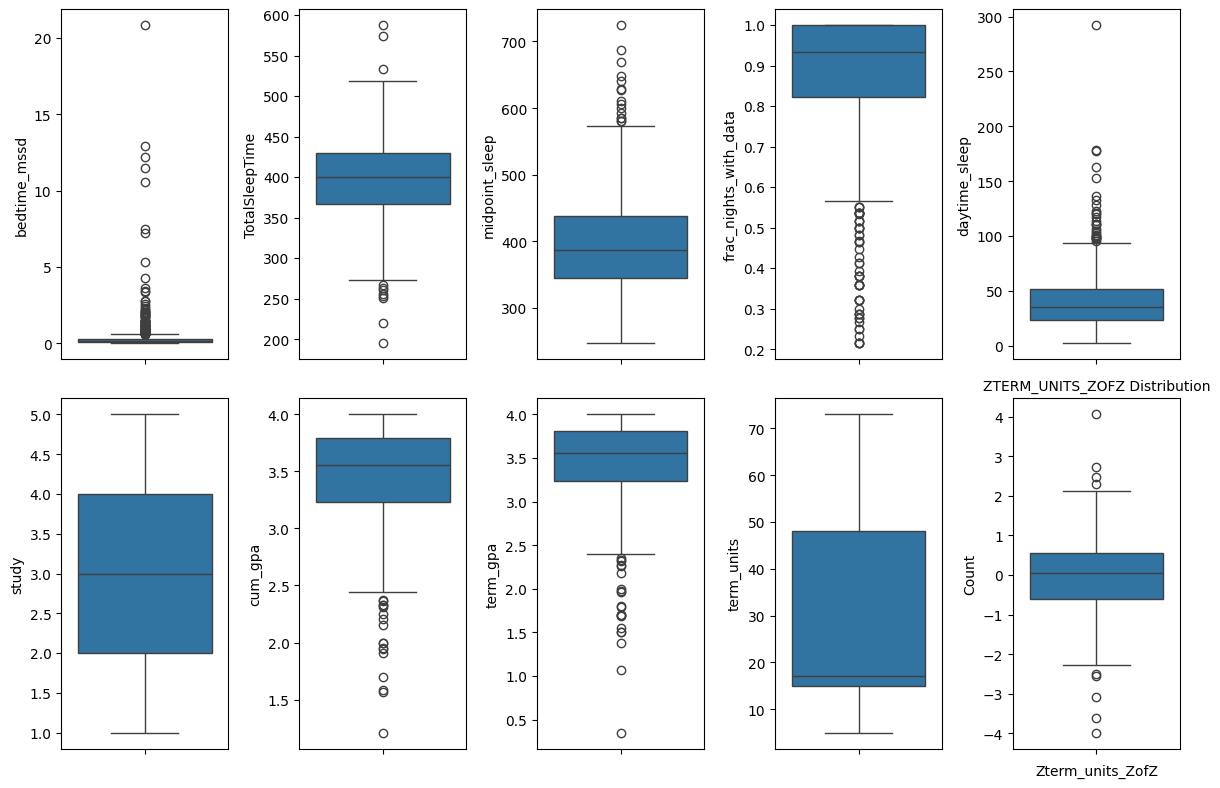

In [ ]:
# Numerical Outliers
# Identify outliers in numerical variables using techniques like Winsorization or trimming.

# List of variables to analyze
variables = ['bedtime_mssd', 'TotalSleepTime', 'midpoint_sleep', 'frac_nights_with_data', 'daytime_sleep', 'study', 'cum_gpa',
             'term_gpa', 'term_units', 'Zterm_units_ZofZ']
num_rows = 2  # Number of rows for the subplots
num_cols = 5  # Number of columns for the subplots

# Create a figure with subplots and adjust spacing
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 8))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.88, wspace=0.4, hspace=0.4)  # Adjust margins and spacing

# Loop through variables and create histograms on subplots
row_counter = 0
col_counter = 0
for var in variables:
    ax = axes[row_counter, col_counter]  # Access the current subplot

    # Create Boxplot
    sns.boxplot(df[var], ax=ax)

    # Set title and labels
    plt.title(f'{var.upper()} Distribution', fontsize=10)
    plt.xlabel(var, fontsize=10)
    plt.ylabel('Count', fontsize=10)

    # Update counters and handle overflow
    col_counter += 1
    if col_counter == num_cols:
        col_counter = 0
        row_counter += 1

plt.tight_layout()

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(



BEDTIME_MSSD: 
count    625.000000
mean       0.302718
std        0.401090
min        0.031593
25%        0.074576
50%        0.135441
75%        0.292522
max        1.552286
Name: bedtime_mssd, dtype: float64

BEDTIME_MSSD: 
bedtime_mssd
1.552286    32
0.031593    32
0.044613     2
0.049417     1
0.781137     1
            ..
0.162916     1
0.566820     1
0.187560     1
0.089489     1
0.091325     1
Name: count, Length: 562, dtype: int64

BEDTIME_MSSD: 
bedtime_mssd
1.552286    5.12
0.031593    5.12
0.044613    0.32
0.049417    0.16
0.781137    0.16
            ... 
0.162916    0.16
0.566820    0.16
0.187560    0.16
0.089489    0.16
0.091325    0.16
Name: proportion, Length: 562, dtype: float64


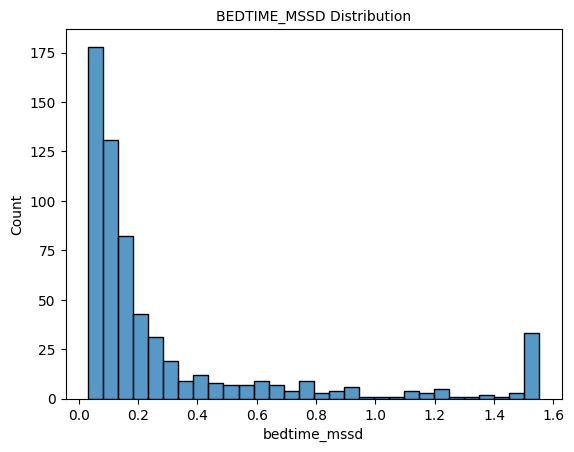

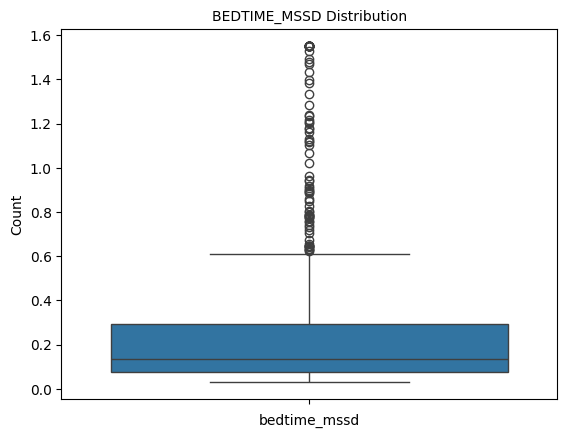

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(



TOTALSLEEPTIME: 
count    625.000000
mean     397.556834
std       45.123752
min      306.000000
25%      366.758621
50%      400.541667
75%      430.125000
max      477.428571
Name: TotalSleepTime, dtype: float64

TOTALSLEEPTIME: 
TotalSleepTime
477.428571    32
306.000000    32
411.642857     2
359.500000     2
387.928571     2
              ..
395.357143     1
421.785714     1
446.178571     1
413.740741     1
383.448276     1
Name: count, Length: 555, dtype: int64

TOTALSLEEPTIME: 
TotalSleepTime
477.428571    5.12
306.000000    5.12
411.642857    0.32
359.500000    0.32
387.928571    0.32
              ... 
395.357143    0.16
421.785714    0.16
446.178571    0.16
413.740741    0.16
383.448276    0.16
Name: proportion, Length: 555, dtype: float64


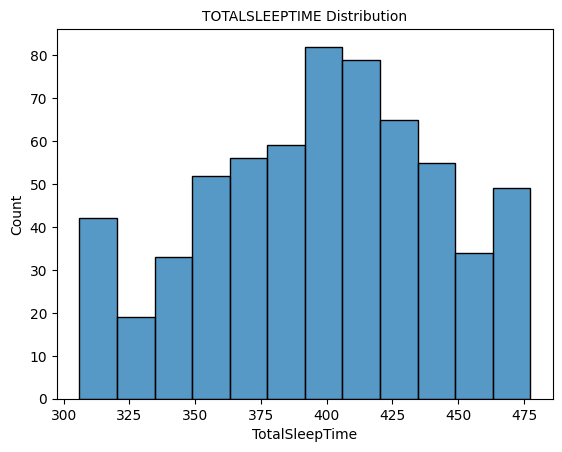

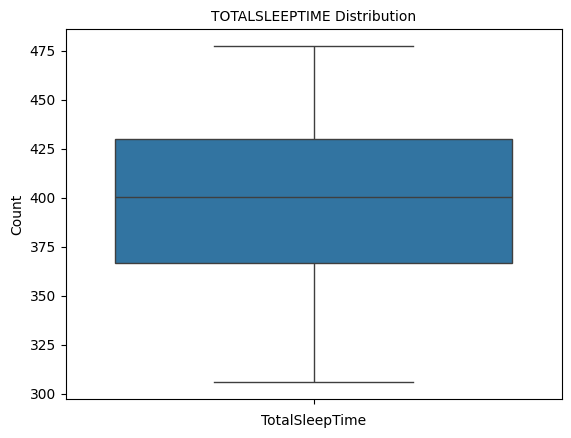

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(



MIDPOINT_SLEEP: 
count    625.000000
mean     397.394921
std       64.600110
min      305.173077
25%      345.730769
50%      387.086207
75%      437.733333
max      539.553571
Name: midpoint_sleep, dtype: float64

MIDPOINT_SLEEP: 
midpoint_sleep
539.553571    32
305.173077    32
345.000000     2
514.000000     2
407.517857     2
              ..
350.589286     1
332.125000     1
383.410714     1
313.678571     1
407.931035     1
Name: count, Length: 558, dtype: int64

MIDPOINT_SLEEP: 
midpoint_sleep
539.553571    5.12
305.173077    5.12
345.000000    0.32
514.000000    0.32
407.517857    0.32
              ... 
350.589286    0.16
332.125000    0.16
383.410714    0.16
313.678571    0.16
407.931035    0.16
Name: proportion, Length: 558, dtype: float64


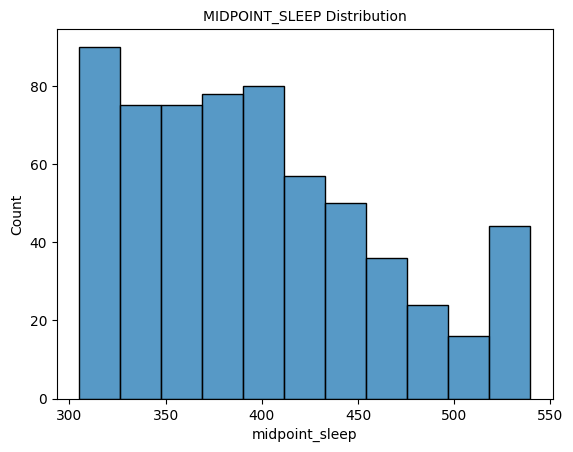

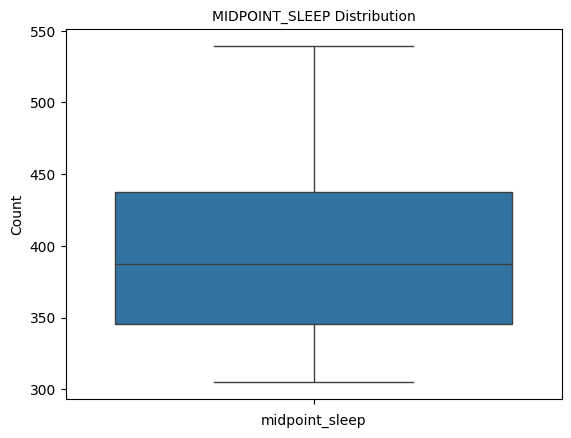

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(



FRAC_NIGHTS_WITH_DATA: 
count    625.000000
mean       0.873793
std        0.159741
min        0.448276
25%        0.821429
50%        0.933333
75%        1.000000
max        1.000000
Name: frac_nights_with_data, dtype: float64

FRAC_NIGHTS_WITH_DATA: 
frac_nights_with_data
1.000000    192
0.964286     44
0.448276     32
0.966667     32
0.928571     32
0.965517     30
0.931034     20
0.892857     19
0.896552     17
0.862069     16
0.933333     15
0.793103     13
0.900000     12
0.857143     11
0.827586     10
0.866667      9
0.714286      8
0.724138      8
0.833333      8
0.655172      8
0.785714      8
0.800000      7
0.821429      7
0.750000      6
0.758621      6
0.700000      6
0.586207      6
0.607143      5
0.535714      5
0.633333      4
0.500000      4
0.551724      3
0.517241      3
0.571429      2
0.464286      2
0.482759      2
0.689655      2
0.566667      2
0.733333      2
0.620690      1
0.642857      1
0.678571      1
0.666667      1
0.600000      1
0.466667      1
0.53

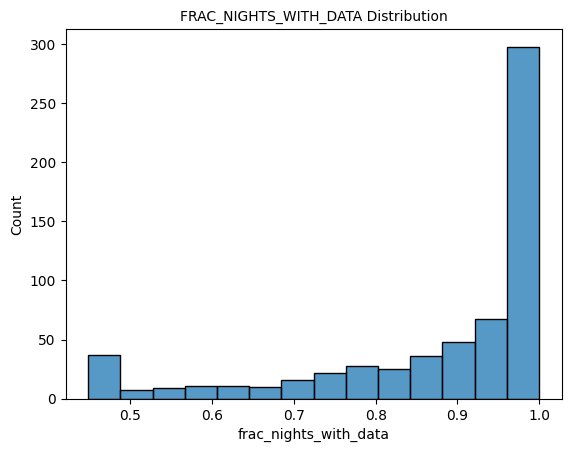

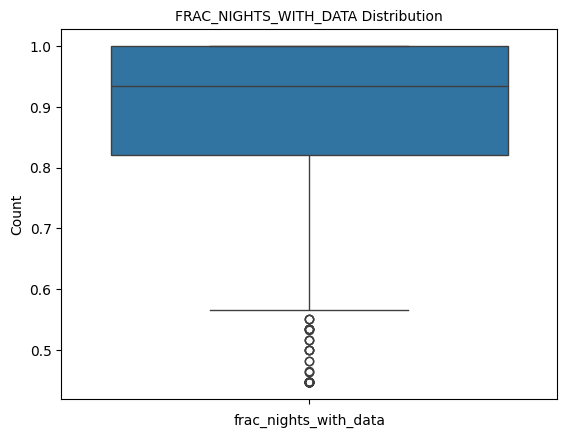

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(



DAYTIME_SLEEP: 
count    625.000000
mean      39.879995
std       21.545976
min       11.689655
25%       23.130435
50%       35.083333
75%       51.571429
max       90.440000
Name: daytime_sleep, dtype: float64

DAYTIME_SLEEP: 
daytime_sleep
11.689655    32
90.440000    32
40.928571     2
51.038462     2
35.642857     2
             ..
59.678571     1
51.033333     1
33.464286     1
70.607143     1
44.344828     1
Name: count, Length: 540, dtype: int64

DAYTIME_SLEEP: 
daytime_sleep
11.689655    5.12
90.440000    5.12
40.928571    0.32
51.038462    0.32
35.642857    0.32
             ... 
59.678571    0.16
51.033333    0.16
33.464286    0.16
70.607143    0.16
44.344828    0.16
Name: proportion, Length: 540, dtype: float64


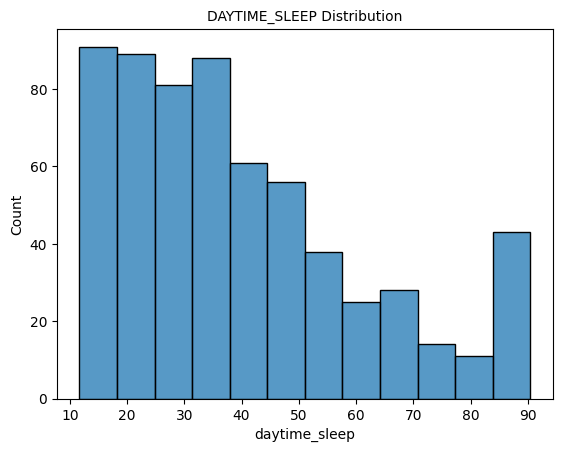

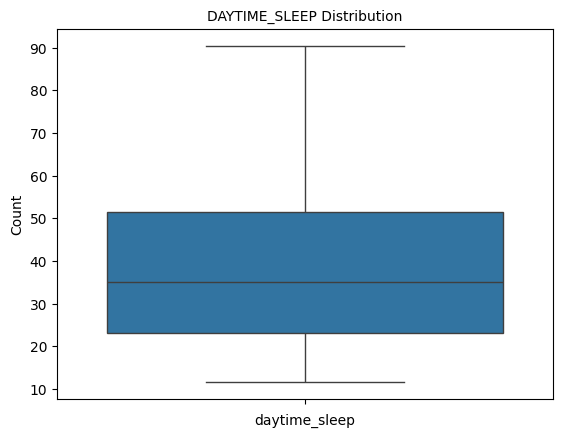

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(



STUDY: 
count    625.000000
mean       3.185600
std        1.318307
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: study, dtype: float64

STUDY: 
study
4    145
2    137
3    137
5    130
1     76
Name: count, dtype: int64

STUDY: 
study
4    23.20
2    21.92
3    21.92
5    20.80
1    12.16
Name: proportion, dtype: float64


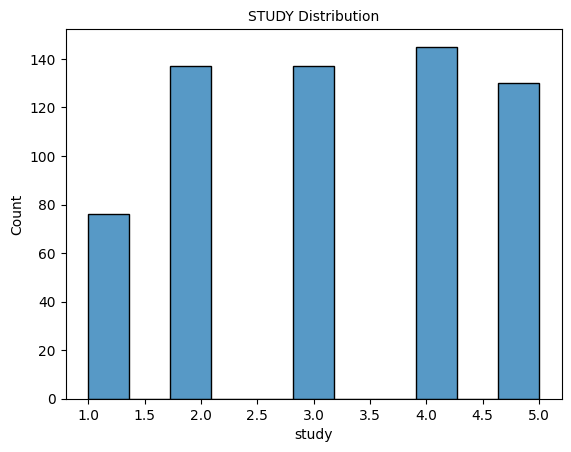

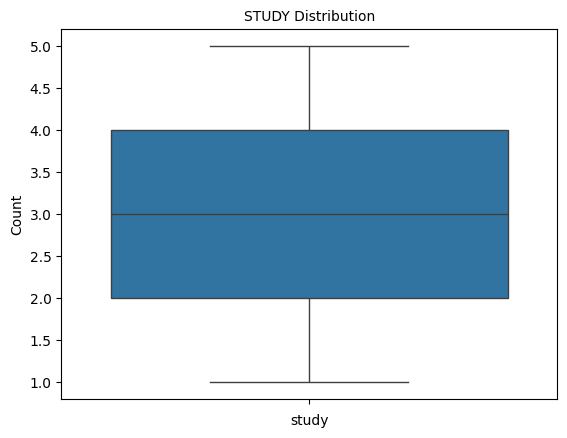

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(



CUM_GPA: 
count    625.000000
mean       3.483547
std        0.386385
min        2.617059
25%        3.230000
50%        3.560000
75%        3.790000
max        4.000000
Name: cum_gpa, dtype: float64

CUM_GPA: 
cum_gpa
4.000000    47
2.617059    32
3.944500    12
3.800000     8
3.790000     8
            ..
3.651515     1
3.532258     1
3.335714     1
2.916666     1
3.800200     1
Name: count, Length: 363, dtype: int64

CUM_GPA: 
cum_gpa
4.000000    7.52
2.617059    5.12
3.944500    1.92
3.800000    1.28
3.790000    1.28
            ... 
3.651515    0.16
3.532258    0.16
3.335714    0.16
2.916666    0.16
3.800200    0.16
Name: proportion, Length: 363, dtype: float64


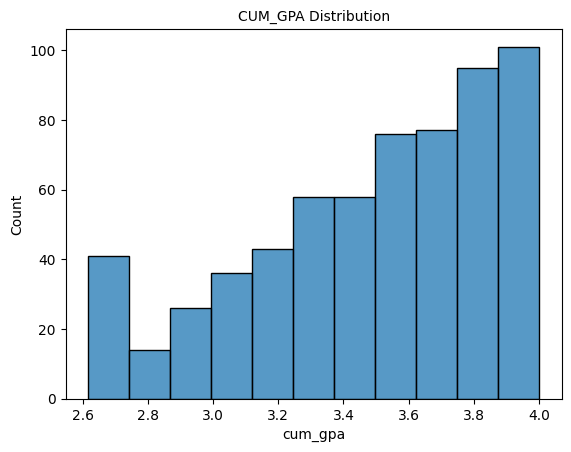

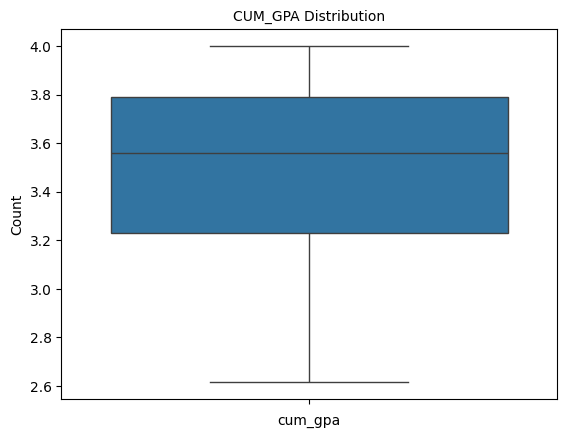

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(



TERM_GPA: 
count    625.000000
mean       3.474610
std        0.425108
min        2.490000
25%        3.233333
50%        3.555667
75%        3.810000
max        4.000000
Name: term_gpa, dtype: float64

TERM_GPA: 
term_gpa
4.000000    54
2.490000    32
3.500000    16
3.944500    11
3.000000    10
            ..
3.127777     1
2.840000     1
3.240000     1
3.333333     1
3.222167     1
Name: count, Length: 240, dtype: int64

TERM_GPA: 
term_gpa
4.000000    8.64
2.490000    5.12
3.500000    2.56
3.944500    1.76
3.000000    1.60
            ... 
3.127777    0.16
2.840000    0.16
3.240000    0.16
3.333333    0.16
3.222167    0.16
Name: proportion, Length: 240, dtype: float64


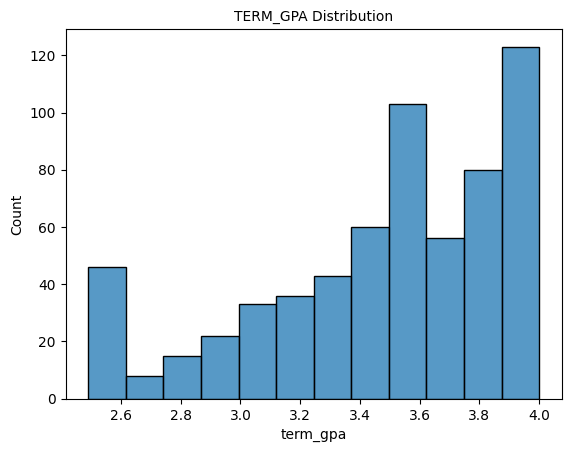

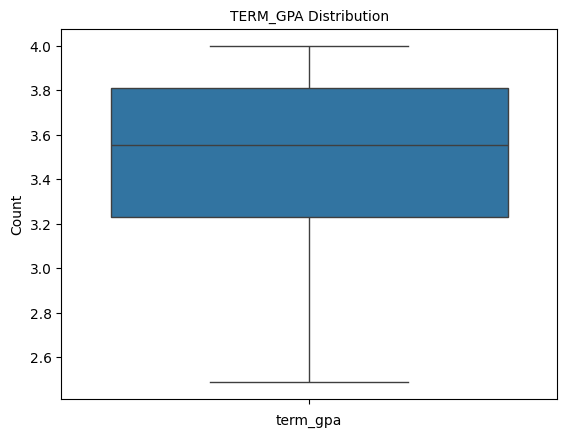

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(



TERM_UNITS: 
count    480.000000
mean      29.552083
std       17.517108
min       12.000000
25%       15.000000
50%       17.000000
75%       48.000000
max       73.000000
Name: term_units, dtype: float64

TERM_UNITS: 
term_units
15.0    99
13.0    41
12.0    36
14.0    30
18.0    28
45.0    28
48.0    25
16.0    23
49.0    22
17.0    16
51.0    14
53.0    13
46.0    12
47.0    11
52.0    10
50.0    10
54.0     9
43.0     7
60.0     5
57.0     5
40.0     5
55.0     4
56.0     4
42.0     3
41.0     3
58.0     3
39.0     3
59.0     2
61.0     2
44.0     2
38.0     1
73.0     1
64.0     1
63.0     1
19.0     1
Name: count, dtype: int64

TERM_UNITS: 
term_units
15.0    20.625000
13.0     8.541667
12.0     7.500000
14.0     6.250000
18.0     5.833333
45.0     5.833333
48.0     5.208333
16.0     4.791667
49.0     4.583333
17.0     3.333333
51.0     2.916667
53.0     2.708333
46.0     2.500000
47.0     2.291667
52.0     2.083333
50.0     2.083333
54.0     1.875000
43.0     1.458333
60.0    

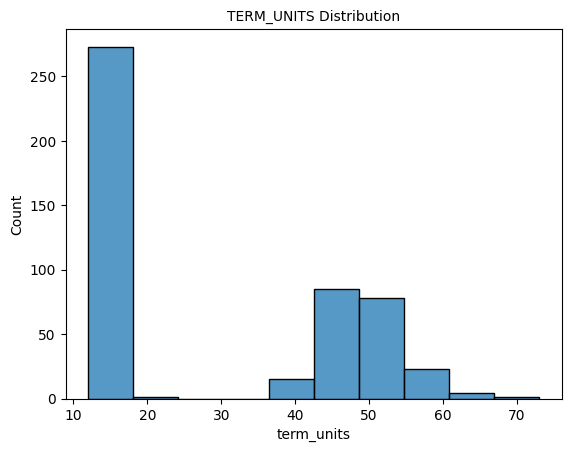

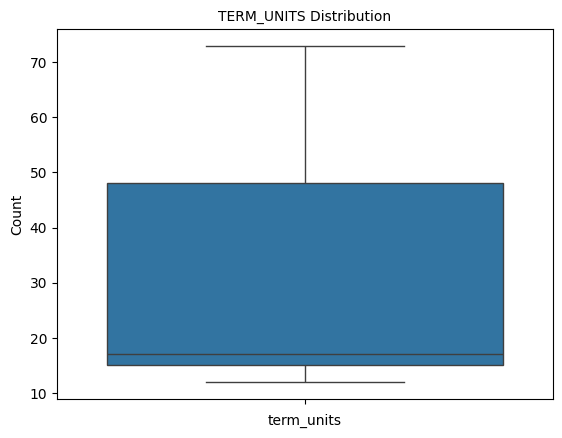

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(



ZTERM_UNITS_ZOFZ: 
count    480.000000
mean       0.029400
std        0.925093
min       -1.536743
25%       -0.604268
50%        0.041207
75%        0.560271
max        4.055295
Name: Zterm_units_ZofZ, dtype: float64

ZTERM_UNITS_ZOFZ: 
Zterm_units_ZofZ
 0.373361    57
 0.041207    42
-1.536743    32
-1.000209    21
-0.837739    20
-0.497815    20
-0.479501    18
 0.561915    18
-0.313485    17
 1.603331    15
 1.680126    13
-0.062227    12
 1.082623    11
 0.111557    11
-0.138734    11
 0.560271     9
-0.604268     8
-0.127051     8
-0.365660     8
-0.842877     8
 0.385520     8
 0.588774     7
-1.520917     7
 0.210769     7
 0.735022     6
 0.036017     6
-0.933403     6
 1.244538     5
 0.808950     5
 1.259276     5
-1.187241     5
 1.783529     4
 1.065992     4
 0.350166     4
-0.662987     4
-1.368992     3
-0.488236     3
 1.781817     3
 1.434027     3
 1.304600     3
-1.361992     3
 1.543209     2
 0.909773     2
 1.608778     2
-1.320094     2
 1.958281     2
 0.82738

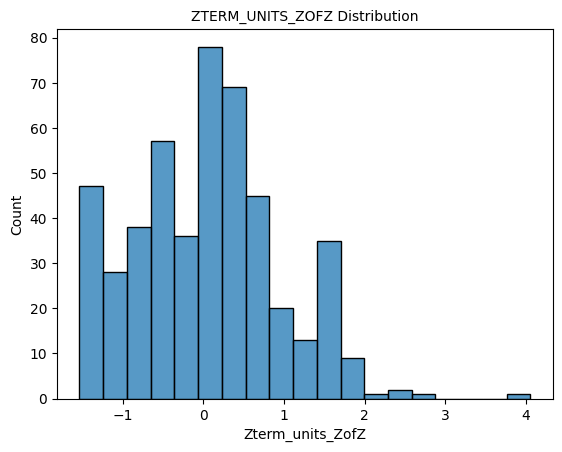

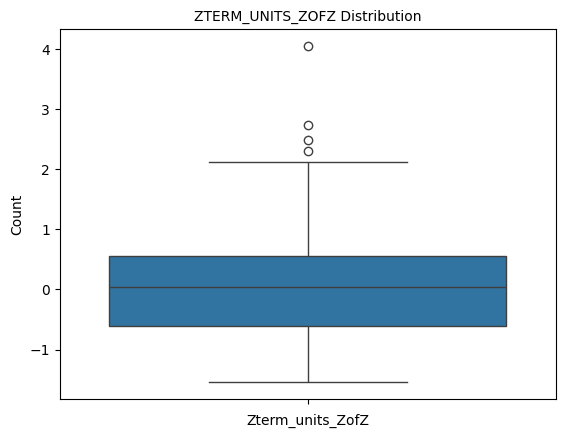

In [ ]:
# Winsorization
from scipy.stats.mstats import winsorize

# List all variables
variables = ['bedtime_mssd', 'TotalSleepTime', 'midpoint_sleep', 'frac_nights_with_data', 'daytime_sleep', 'study', 'cum_gpa',
             'term_gpa', 'term_units', 'Zterm_units_ZofZ']

# Winsorize each variable
for var in variables:
    df[var] = winsorize(df[var], limits=[0.05, 0.05])  # Winsorize at the 5th and 95th percentiles
    print(f'\n{var.upper()}: \n{df[var].describe()}')
    print(f'\n{var.upper()}: \n{df[var].value_counts()}')
    print(f'\n{var.upper()}: \n{df[var].value_counts(normalize=True)*100}')
    sns.histplot(df[var])
    plt.title(f'{var.upper()} Distribution', fontsize=10)
    plt.xlabel(var, fontsize=10)
    plt.ylabel('Count', fontsize=10)
    plt.show()
    sns.boxplot(df[var])
    plt.title(f'{var.upper()} Distribution', fontsize=10)
    plt.xlabel(var, fontsize=10)
    plt.ylabel('Count', fontsize=10)
    plt.show()

## **Bivariate Analysis**
### **Categorical-Categorical**


In [ ]:
# Analyze the relationship between categorical variables using cross-tabulation and chi-square tests.
# For example, examine the relationship between demo_race and demo_gender.

from scipy.stats import chi2_contingency
from IPython.display import display

# List categorical variables
categorical_columns = ['demo_race', 'demo_gender', 'demo_firstgen', 'cohort']

for i in range(len(categorical_columns)):
    for j in range(i + 1, len(categorical_columns)):
        var1 = categorical_columns[i]
        var2 = categorical_columns[j]

        # Create cross-tabulation
        cross_tab = pd.crosstab(df[var1], df[var2])

        # Perform chi-square test
        chi2, p_value, _, _ = chi2_contingency(cross_tab)

        print(f"\nCross-tabulation for {var1} and {var2}:")
        display(cross_tab.style.background_gradient(cmap='Blues'))
        print(f"\nChi-square statistic: {chi2:.3f}")
        print(f"P-value: {p_value:.3f}")

        if p_value < 0.05:
            print(f"There is a significant association between {var1} and {var2}.")
        else:
            print(f"There is no significant association between {var1} and {var2}.")



Cross-tabulation for demo_race and demo_gender:



Chi-square statistic: 3.654
P-value: 0.056
There is no significant association between demo_race and demo_gender.

Cross-tabulation for demo_race and demo_firstgen:



Chi-square statistic: 14.991
P-value: 0.000
There is a significant association between demo_race and demo_firstgen.

Cross-tabulation for demo_race and cohort:



Chi-square statistic: 3.969
P-value: 0.410
There is no significant association between demo_race and cohort.

Cross-tabulation for demo_gender and demo_firstgen:



Chi-square statistic: 0.106
P-value: 0.745
There is no significant association between demo_gender and demo_firstgen.

Cross-tabulation for demo_gender and cohort:



Chi-square statistic: 11.632
P-value: 0.020
There is a significant association between demo_gender and cohort.

Cross-tabulation for demo_firstgen and cohort:



Chi-square statistic: 48.822
P-value: 0.000
There is a significant association between demo_firstgen and cohort.


### **Summary of Findings:**

  * **demo_race** and **demo_gender:**
      * There is a **weak** association between demo_race and demo_gender. The chi-square test yielded a p-value of **0.056**, which is marginally significant but not conclusive.
  
  * **demo_race** and **demo_firstgen:**
      * There is a **strong** association between demo_race and demo_firstgen. The chi-square test yielded a p-value of **0.000**, indicating a statistically significant relationship.
  
  * **demo_race** and **cohort:**
      * There is **no significant** association between demo_race and cohort. The chi-square test yielded a p-value of **0.410**.
  
  * **demo_gender** and **demo_firstgen:**
      * There is **no significant** association between demo_gender and demo_firstgen. The chi-square test yielded a p-value of **0.745**.
  
  * **demo_gender** and **cohort:**
      * There is a **moderate** association between demo_gender and cohort. The chi-square test yielded a p-value of **0.020**, suggesting a significant relationship.
  
  * **demo_firstgen** and **cohort:** There is a **strong** association between demo_firstgen and cohort. The chi-square test yielded a p-value of **0.000**, indicating a statistically significant relationship.

### **Numerical-Numerical**

Correlation Matrix: 
                       bedtime_mssd  TotalSleepTime  midpoint_sleep  \
bedtime_mssd               1.000000       -0.278161        0.539439   
TotalSleepTime            -0.278161        1.000000       -0.329892   
midpoint_sleep             0.539439       -0.329892        1.000000   
frac_nights_with_data     -0.492550        0.138412       -0.285423   
daytime_sleep              0.200600       -0.201606        0.106725   
study                     -0.132122       -0.075148       -0.007662   
cum_gpa                   -0.134840        0.099134       -0.181545   
term_gpa                  -0.195750        0.167782       -0.180774   
term_units                 0.068420       -0.238451        0.290743   
Zterm_units_ZofZ           0.042726       -0.036418       -0.027288   

                       frac_nights_with_data  daytime_sleep     study  \
bedtime_mssd                       -0.492550       0.200600 -0.132122   
TotalSleepTime                      0.138412      -

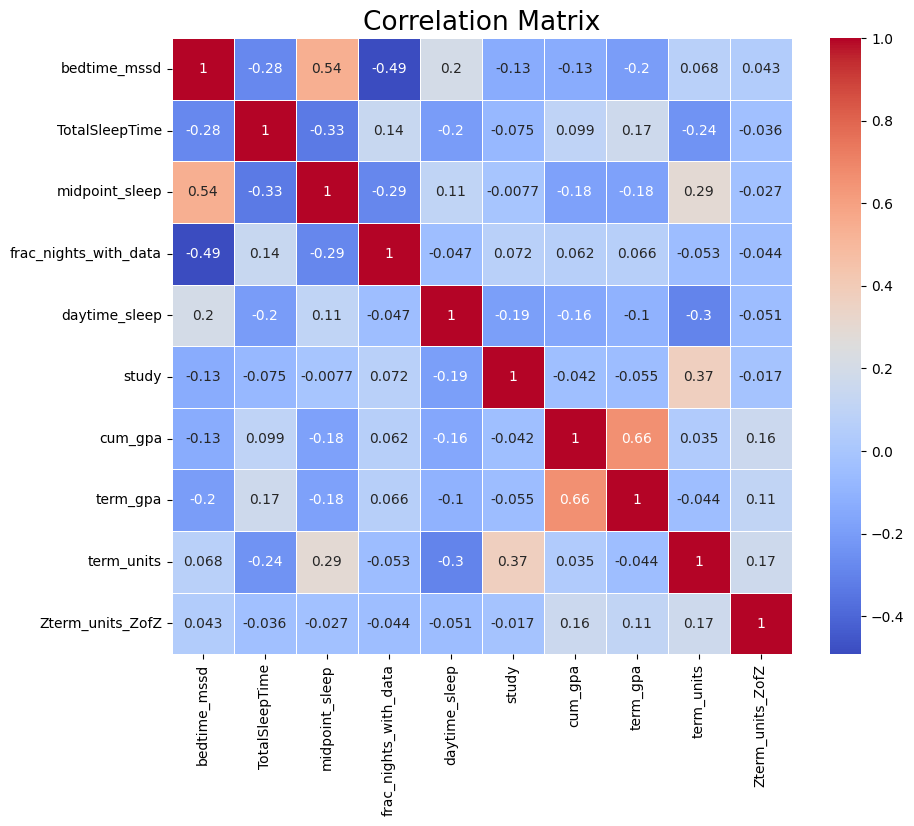

In [ ]:
# Calculate correlation coefficients between numerical variables to identify potential relationships.
# For example, assess the correlation between bedtime_mssd and TotalSleepTime.

# List numerical variables
numerical_variables = ['bedtime_mssd', 'TotalSleepTime', 'midpoint_sleep', 'frac_nights_with_data', 'daytime_sleep', 'study', 'cum_gpa',
             'term_gpa', 'term_units', 'Zterm_units_ZofZ']


# Calculate correlation matrix
correlation_matrix = df[numerical_variables].corr()

# Print correlation matrix
print(f'Correlation Matrix: \n{correlation_matrix}')

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=19)
plt.show()

### **Summary of Findings:**

  * **Strong Positive Correlations:**

    * **bedtime_mssd** and **midpoint_sleep**:
        * Have a **strong** positive correlation (**0.54**), suggesting that students with more consistent bedtimes tend to have later sleep midpoints.
  
    * **TotalSleepTime** and **term_gpa**
        * Have a **moderate** positive correlation (**0.17**), indicating that students with more total sleep time might have slightly higher term GPAs.
  
    * **term_units** and **Zterm_units_ZofZ**
        * Have a **strong** positive correlation (**0.66**), which is expected as they are both measures of course load.

  * **Strong Negative Correlations:**

    * **bedtime_mssd** and **frac_nights_with_data**
        * Have a **strong** negative correlation (**-0.49**), suggesting that students with more consistent bedtimes tend to have a higher percentage of nights with captured data.
  
    * **TotalSleepTime** and **midpoint_sleep**
      * Have a **moderate** negative correlation (**-0.33**), indicating that students who sleep longer tend to have earlier sleep midpoints.

  * **Weak or No Correlations:**

    * Most other pairs of variables show weak or no correlations, indicating that they are not strongly linearly related.
  
    * Some notable exceptions include the relationships between daytime_sleep and the academic variables (cum_gpa, term_gpa, term_units, Zterm_units_ZofZ), which show moderate negative correlations.

  * **Overall Assessment:**

  The correlation matrix reveals several interesting relationships between the variables:

    * Bedtime consistency is associated with later sleep midpoints and more complete data collection.
  
    * Total sleep time has a weak positive association with academic performance.
  
    * Daytime sleep has a negative association with academic performance.
  
    * Course load variables (term_units, Zterm_units_ZofZ) are strongly correlated, as expected.

### **Categorical-Numerical**



Group statistics for bedtime_mssd by demo_race:
demo_race
0    0.369051
1    0.287280
Name: bedtime_mssd, dtype: float64


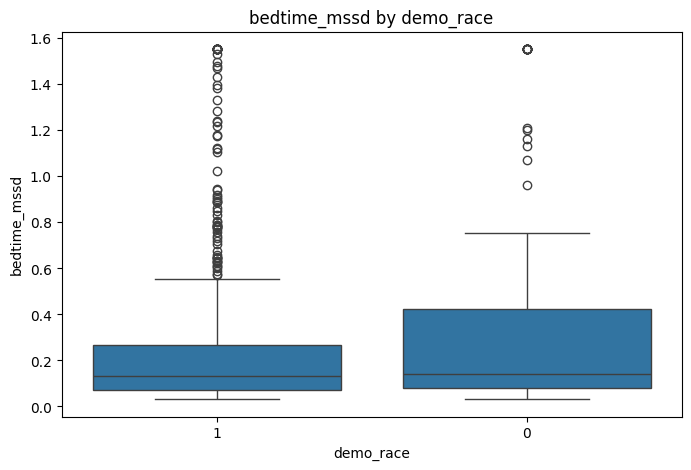


ANOVA Table:
              df     sum_sq   mean_sq         F    PR(>F)
demo_race    1.0   0.640044  0.640044  3.997672  0.045997
Residual   623.0  99.744892  0.160104       NaN       NaN

There is a significant difference in bedtime_mssd between the groups.

The p-value is 0.045996980205421235

Group statistics for TotalSleepTime by demo_race:
demo_race
0    394.630151
1    398.237995
Name: TotalSleepTime, dtype: float64


<ipython-input-17-156ab38f32e6>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:
<ipython-input-17-156ab38f32e6>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"\nThe p-value is {anova_table['PR(>F)'][0]}")


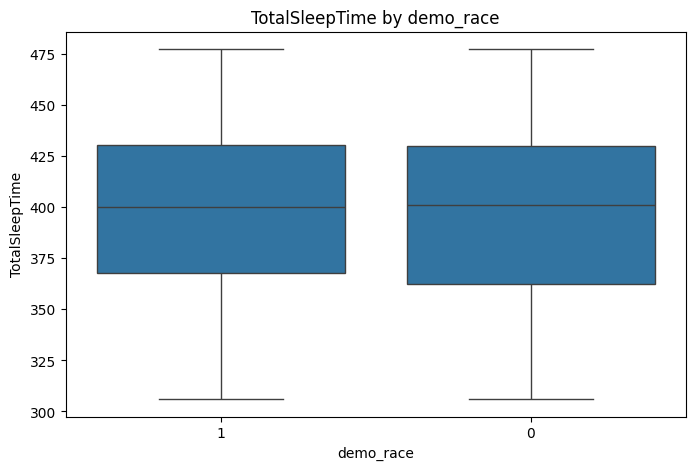


ANOVA Table:
              df        sum_sq      mean_sq        F    PR(>F)
demo_race    1.0  1.245964e+03  1245.963819  0.61154  0.434506
Residual   623.0  1.269314e+06  2037.421382      NaN       NaN

There is no significant difference in TotalSleepTime between the groups.

Group statistics for midpoint_sleep by demo_race:
demo_race
0    406.613592
1    395.249353
Name: midpoint_sleep, dtype: float64


<ipython-input-17-156ab38f32e6>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:


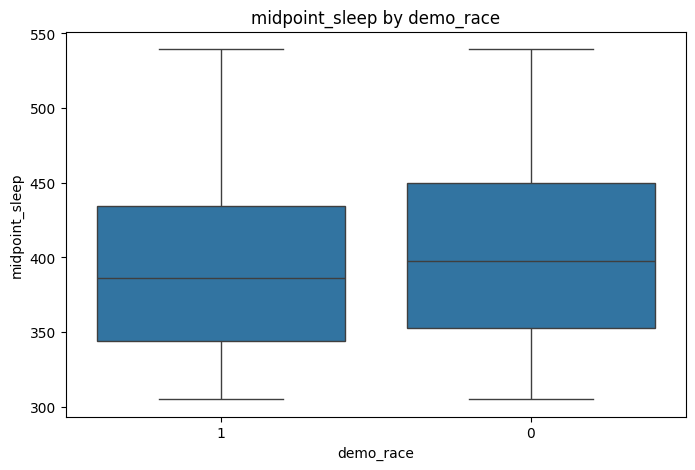


ANOVA Table:
              df        sum_sq       mean_sq         F    PR(>F)
demo_race    1.0  1.236205e+04  12362.053583  2.971626  0.085233
Residual   623.0  2.591699e+06   4160.029973       NaN       NaN

There is no significant difference in midpoint_sleep between the groups.

Group statistics for frac_nights_with_data by demo_race:
demo_race
0    0.870224
1    0.874623
Name: frac_nights_with_data, dtype: float64


<ipython-input-17-156ab38f32e6>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:


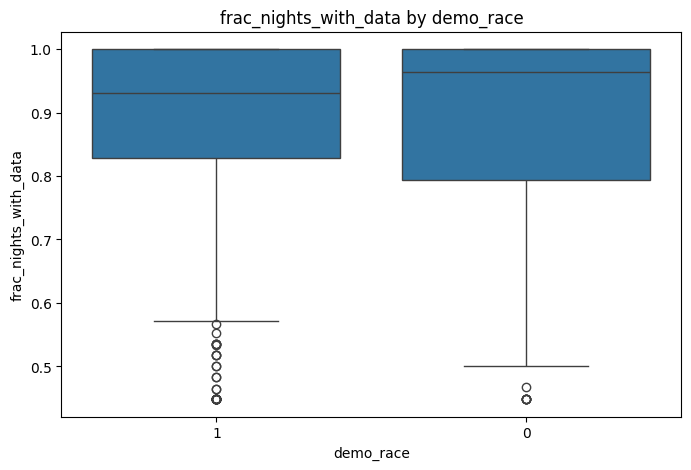


ANOVA Table:
              df     sum_sq   mean_sq         F   PR(>F)
demo_race    1.0   0.001852  0.001852  0.072486  0.78784
Residual   623.0  15.920837  0.025555       NaN      NaN

There is no significant difference in frac_nights_with_data between the groups.

Group statistics for daytime_sleep by demo_race:
demo_race
0    44.967130
1    38.696007
Name: daytime_sleep, dtype: float64


<ipython-input-17-156ab38f32e6>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:


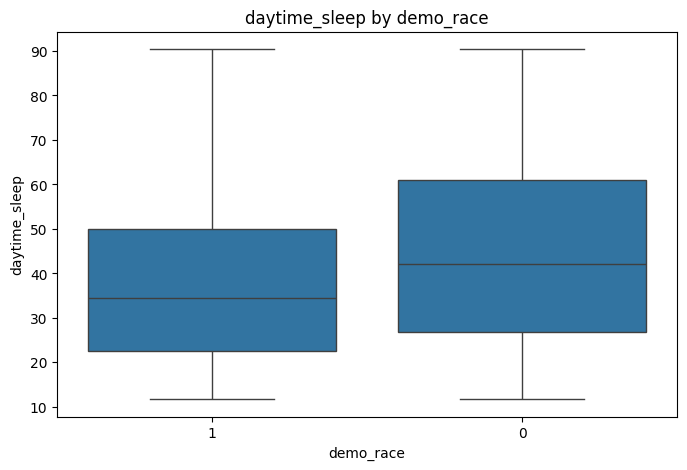


ANOVA Table:
              df         sum_sq      mean_sq         F    PR(>F)
demo_race    1.0    3764.441057  3764.441057  8.202616  0.004324
Residual   623.0  285914.493368   458.931771       NaN       NaN

There is a significant difference in daytime_sleep between the groups.

The p-value is 0.004323829921113868

Group statistics for study by demo_race:
demo_race
0    3.245763
1    3.171598
Name: study, dtype: float64


<ipython-input-17-156ab38f32e6>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:
<ipython-input-17-156ab38f32e6>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"\nThe p-value is {anova_table['PR(>F)'][0]}")


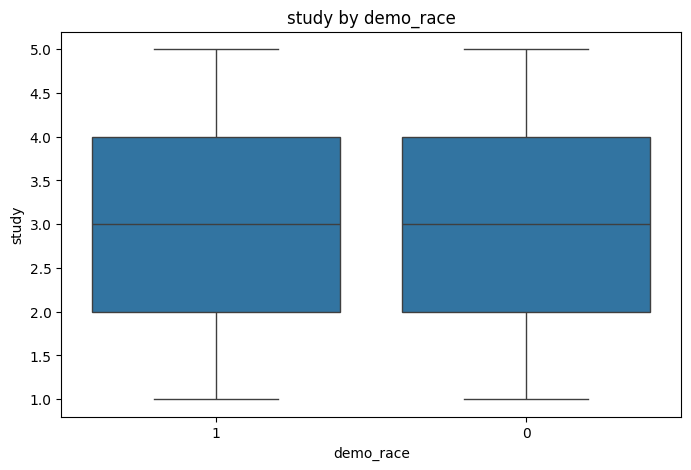


ANOVA Table:
              df       sum_sq   mean_sq         F    PR(>F)
demo_race    1.0     0.526513  0.526513  0.302615  0.582445
Residual   623.0  1083.943887  1.739878       NaN       NaN

There is no significant difference in study between the groups.

Group statistics for cum_gpa by demo_race:
demo_race
0    3.339035
1    3.517181
Name: cum_gpa, dtype: float64


<ipython-input-17-156ab38f32e6>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:


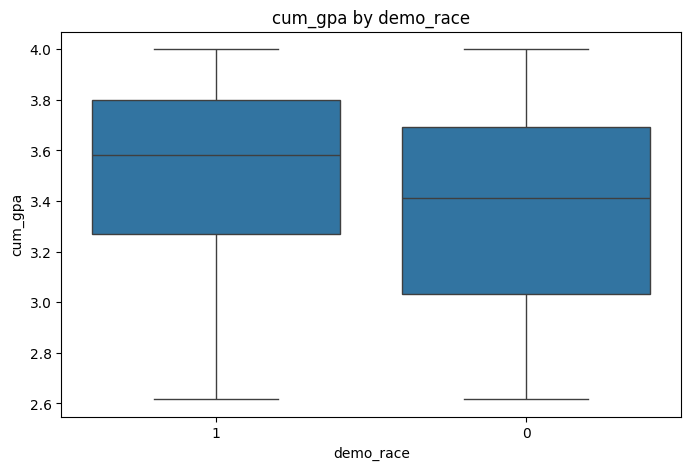


ANOVA Table:
              df     sum_sq   mean_sq          F    PR(>F)
demo_race    1.0   3.037818  3.037818  21.000207  0.000006
Residual   623.0  90.121035  0.144657        NaN       NaN

There is a significant difference in cum_gpa between the groups.

The p-value is 5.5498307074655965e-06

Group statistics for term_gpa by demo_race:
demo_race
0    3.324170
1    3.509623
Name: term_gpa, dtype: float64


<ipython-input-17-156ab38f32e6>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:
<ipython-input-17-156ab38f32e6>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"\nThe p-value is {anova_table['PR(>F)'][0]}")


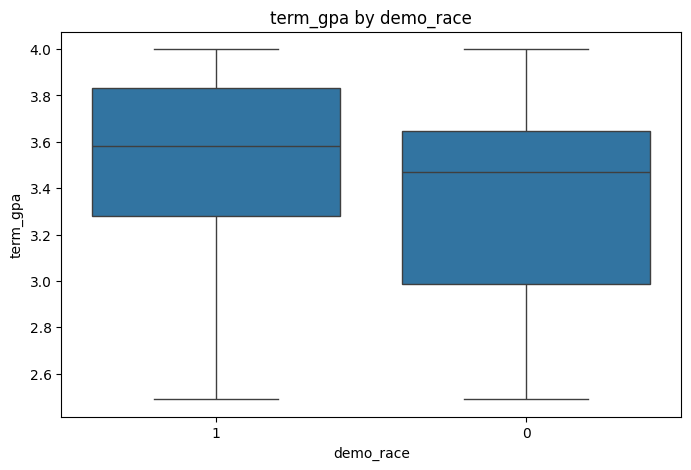


ANOVA Table:
              df      sum_sq   mean_sq          F    PR(>F)
demo_race    1.0    3.292143  3.292143  18.734917  0.000017
Residual   623.0  109.474997  0.175722        NaN       NaN

There is a significant difference in term_gpa between the groups.

The p-value is 1.7497365611001742e-05

Group statistics for term_units by demo_race:
demo_race
0    26.681818
1    30.196429
Name: term_units, dtype: float64


<ipython-input-17-156ab38f32e6>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:
<ipython-input-17-156ab38f32e6>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"\nThe p-value is {anova_table['PR(>F)'][0]}")


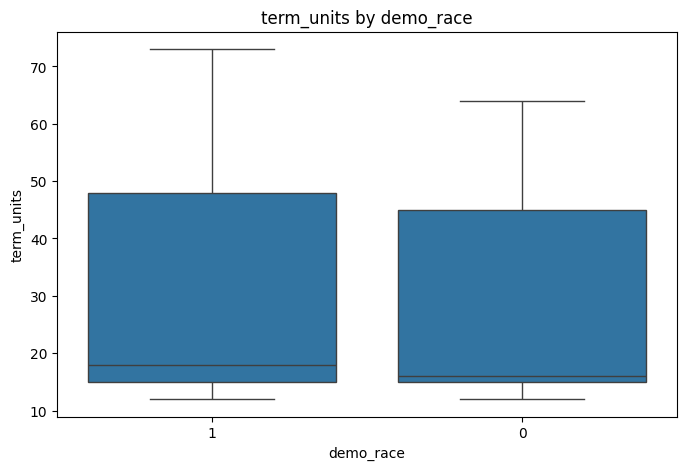


ANOVA Table:
              df         sum_sq     mean_sq         F    PR(>F)
demo_race    1.0     887.732008  887.732008  2.904561  0.088979
Residual   478.0  146092.965909  305.633820       NaN       NaN

There is no significant difference in term_units between the groups.

Group statistics for Zterm_units_ZofZ by demo_race:
demo_race
0   -0.007536
1    0.037692
Name: Zterm_units_ZofZ, dtype: float64


<ipython-input-17-156ab38f32e6>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:


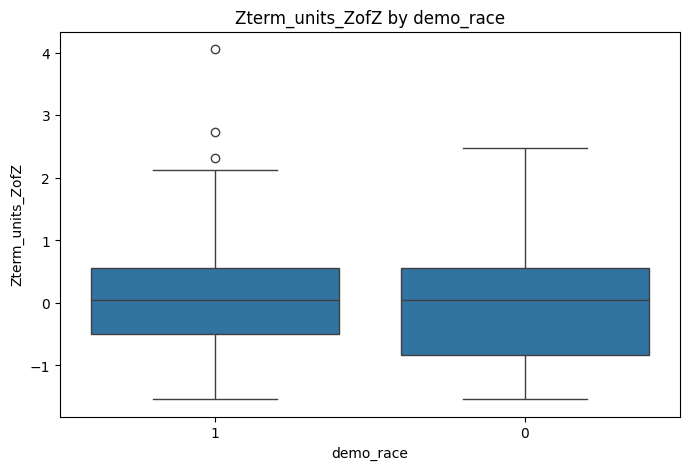


ANOVA Table:
              df     sum_sq  mean_sq         F    PR(>F)
demo_race    1.0    0.14701  0.14701  0.171484  0.678982
Residual   478.0  409.78007  0.85728       NaN       NaN

There is no significant difference in Zterm_units_ZofZ between the groups.

Group statistics for bedtime_mssd by demo_gender:
demo_gender
0    0.310516
1    0.297127
Name: bedtime_mssd, dtype: float64


<ipython-input-17-156ab38f32e6>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:


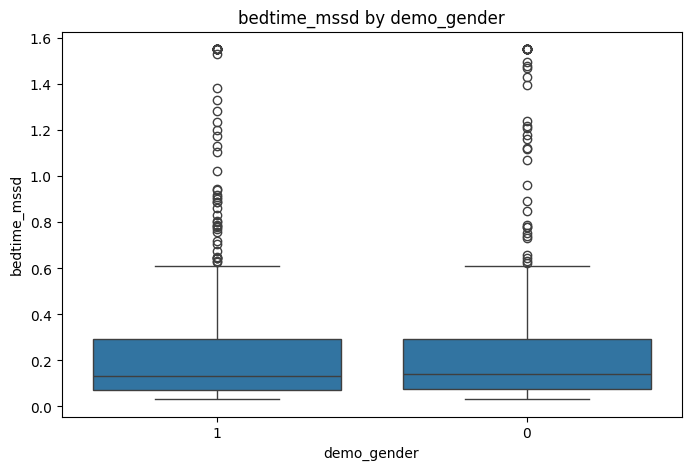


ANOVA Table:
                df      sum_sq   mean_sq         F   PR(>F)
demo_gender    1.0    0.027246  0.027246  0.169139  0.68102
Residual     623.0  100.357690  0.161088       NaN      NaN

There is no significant difference in bedtime_mssd between the groups.

Group statistics for TotalSleepTime by demo_gender:
demo_gender
0    395.692476
1    398.893641
Name: TotalSleepTime, dtype: float64


<ipython-input-17-156ab38f32e6>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:


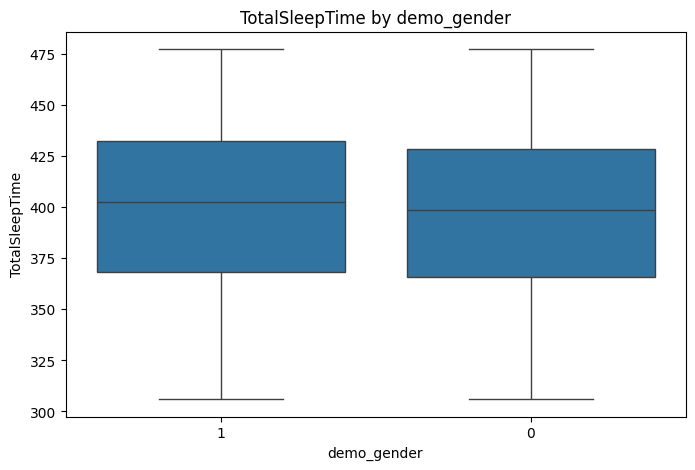


ANOVA Table:
                df        sum_sq      mean_sq         F    PR(>F)
demo_gender    1.0  1.557679e+03  1557.678798  0.764722  0.382192
Residual     623.0  1.269002e+06  2036.921037       NaN       NaN

There is no significant difference in TotalSleepTime between the groups.

Group statistics for midpoint_sleep by demo_gender:
demo_gender
0    404.464805
1    392.325582
Name: midpoint_sleep, dtype: float64


<ipython-input-17-156ab38f32e6>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:


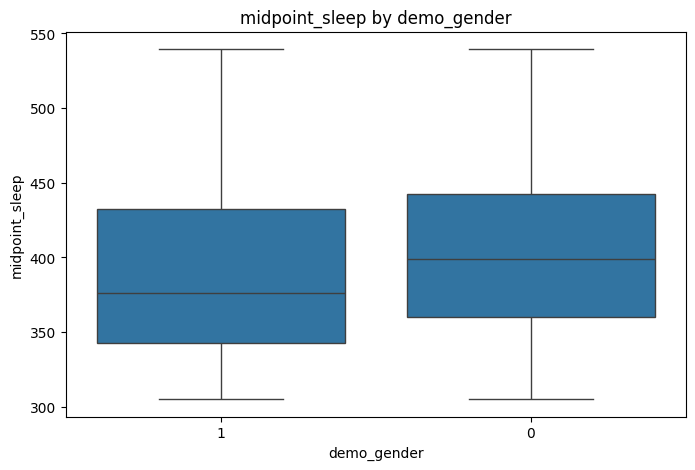


ANOVA Table:
                df        sum_sq       mean_sq         F    PR(>F)
demo_gender    1.0  2.239978e+04  22399.776547  5.405458  0.020394
Residual     623.0  2.581661e+06   4143.918058       NaN       NaN

There is a significant difference in midpoint_sleep between the groups.

The p-value is 0.020394250495957462

Group statistics for frac_nights_with_data by demo_gender:
demo_gender
0    0.876231
1    0.872044
Name: frac_nights_with_data, dtype: float64


<ipython-input-17-156ab38f32e6>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:
<ipython-input-17-156ab38f32e6>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"\nThe p-value is {anova_table['PR(>F)'][0]}")


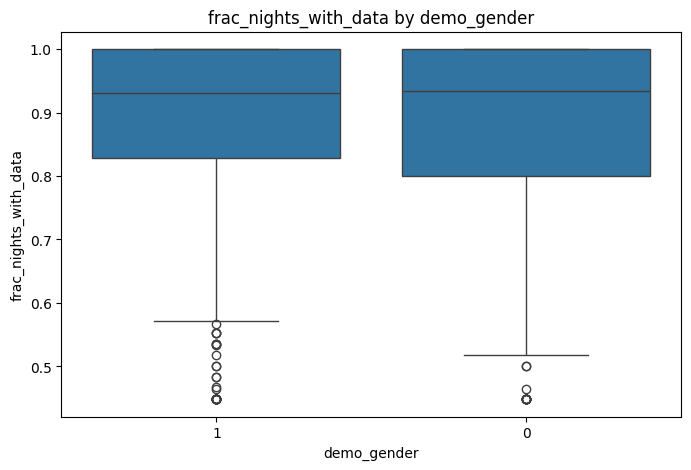


ANOVA Table:
                df     sum_sq   mean_sq         F    PR(>F)
demo_gender    1.0   0.002665  0.002665  0.104296  0.746843
Residual     623.0  15.920024  0.025554       NaN       NaN

There is no significant difference in frac_nights_with_data between the groups.

Group statistics for daytime_sleep by demo_gender:
demo_gender
0    42.053712
1    38.321368
Name: daytime_sleep, dtype: float64


<ipython-input-17-156ab38f32e6>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:


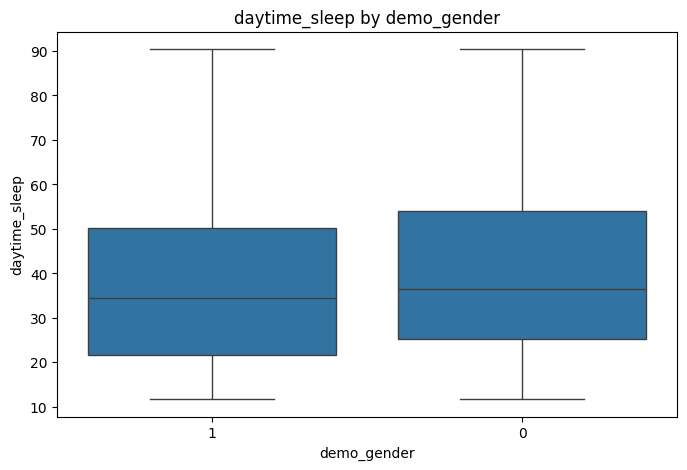


ANOVA Table:
                df         sum_sq      mean_sq        F    PR(>F)
demo_gender    1.0    2117.508995  2117.508995  4.58757  0.032592
Residual     623.0  287561.425429   461.575322      NaN       NaN

There is a significant difference in daytime_sleep between the groups.

The p-value is 0.03259175186744846

Group statistics for study by demo_gender:
demo_gender
0    3.272031
1    3.123626
Name: study, dtype: float64


<ipython-input-17-156ab38f32e6>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:
<ipython-input-17-156ab38f32e6>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"\nThe p-value is {anova_table['PR(>F)'][0]}")


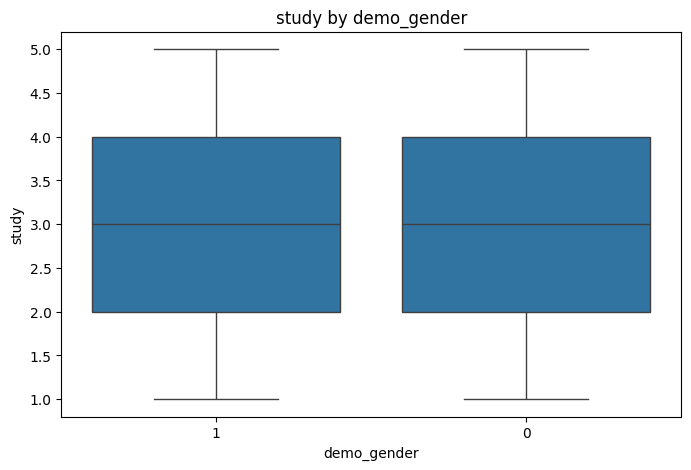


ANOVA Table:
                df       sum_sq   mean_sq         F    PR(>F)
demo_gender    1.0     3.347763  3.347763  1.929158  0.165347
Residual     623.0  1081.122637  1.735349       NaN       NaN

There is no significant difference in study between the groups.

Group statistics for cum_gpa by demo_gender:
demo_gender
0    3.483508
1    3.483575
Name: cum_gpa, dtype: float64


<ipython-input-17-156ab38f32e6>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:


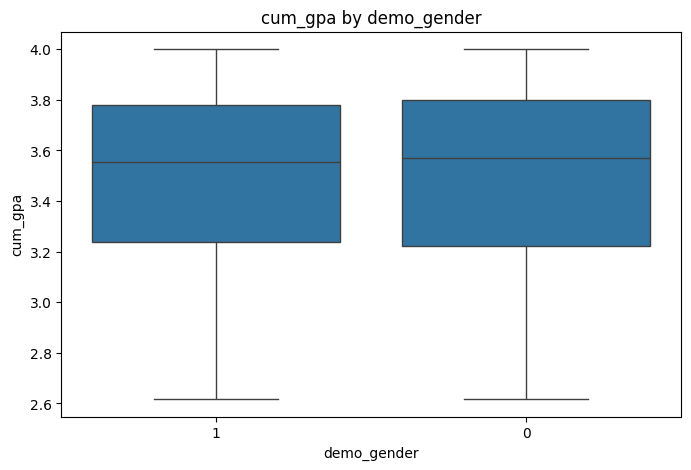


ANOVA Table:
                df        sum_sq       mean_sq         F    PR(>F)
demo_gender    1.0  6.809251e-07  6.809251e-07  0.000005  0.998298
Residual     623.0  9.315885e+01  1.495327e-01       NaN       NaN

There is no significant difference in cum_gpa between the groups.

Group statistics for term_gpa by demo_gender:
demo_gender
0    3.486572
1    3.466033
Name: term_gpa, dtype: float64


<ipython-input-17-156ab38f32e6>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:


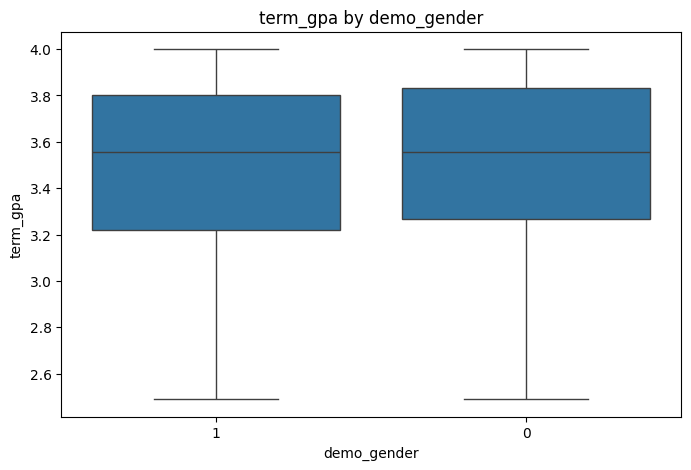


ANOVA Table:
                df      sum_sq   mean_sq         F    PR(>F)
demo_gender    1.0    0.064124  0.064124  0.354467  0.551811
Residual     623.0  112.703015  0.180904       NaN       NaN

There is no significant difference in term_gpa between the groups.

Group statistics for term_units by demo_gender:
demo_gender
0    29.751351
1    29.427119
Name: term_units, dtype: float64


<ipython-input-17-156ab38f32e6>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:


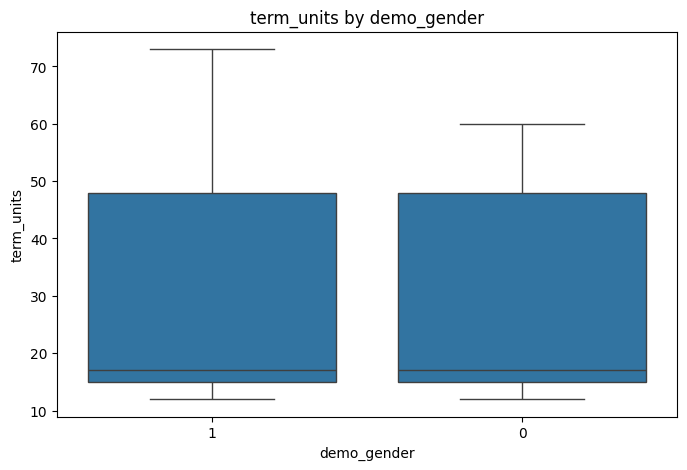


ANOVA Table:
                df         sum_sq     mean_sq         F    PR(>F)
demo_gender    1.0      11.952704   11.952704  0.038875  0.843781
Residual     478.0  146968.745213  307.465994       NaN       NaN

There is no significant difference in term_units between the groups.

Group statistics for Zterm_units_ZofZ by demo_gender:
demo_gender
0   -0.022632
1    0.062031
Name: Zterm_units_ZofZ, dtype: float64


<ipython-input-17-156ab38f32e6>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:


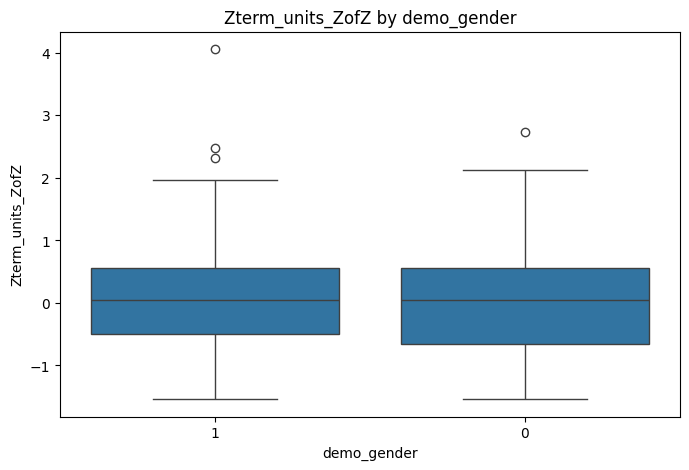


ANOVA Table:
                df      sum_sq   mean_sq         F    PR(>F)
demo_gender    1.0    0.814964  0.814964  0.952191  0.329656
Residual     478.0  409.112115  0.855883       NaN       NaN

There is no significant difference in Zterm_units_ZofZ between the groups.

Group statistics for bedtime_mssd by demo_firstgen:
demo_firstgen
0    0.311151
1    0.259982
Name: bedtime_mssd, dtype: float64


<ipython-input-17-156ab38f32e6>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:


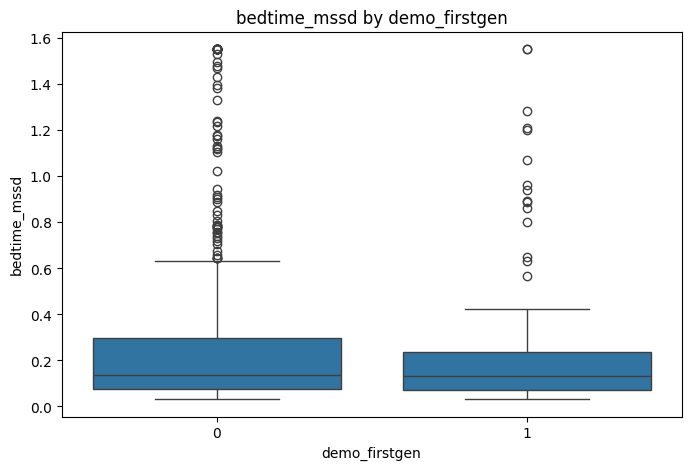


ANOVA Table:
                  df      sum_sq  mean_sq         F    PR(>F)
demo_firstgen    1.0    0.225240  0.22524  1.401007  0.237006
Residual       623.0  100.159696  0.16077       NaN       NaN

There is no significant difference in bedtime_mssd between the groups.

Group statistics for TotalSleepTime by demo_firstgen:
demo_firstgen
0    397.513227
1    397.777835
Name: TotalSleepTime, dtype: float64


<ipython-input-17-156ab38f32e6>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:


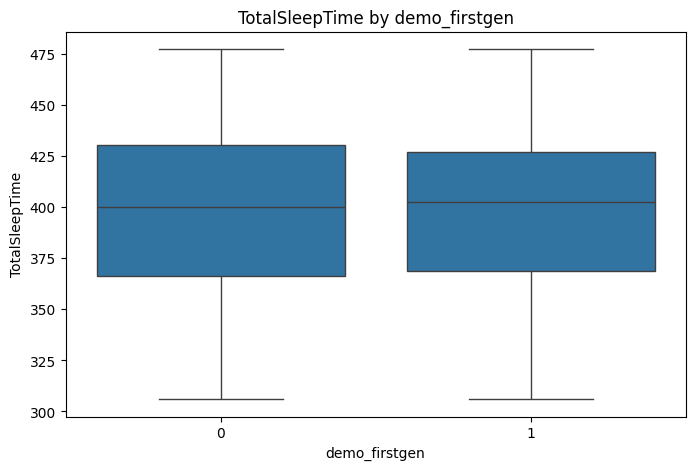


ANOVA Table:
                  df        sum_sq      mean_sq         F    PR(>F)
demo_firstgen    1.0  6.023273e+00     6.023273  0.002953  0.956677
Residual       623.0  1.270553e+06  2039.411656       NaN       NaN

There is no significant difference in TotalSleepTime between the groups.

Group statistics for midpoint_sleep by demo_firstgen:
demo_firstgen
0    399.275701
1    387.863202
Name: midpoint_sleep, dtype: float64


<ipython-input-17-156ab38f32e6>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:


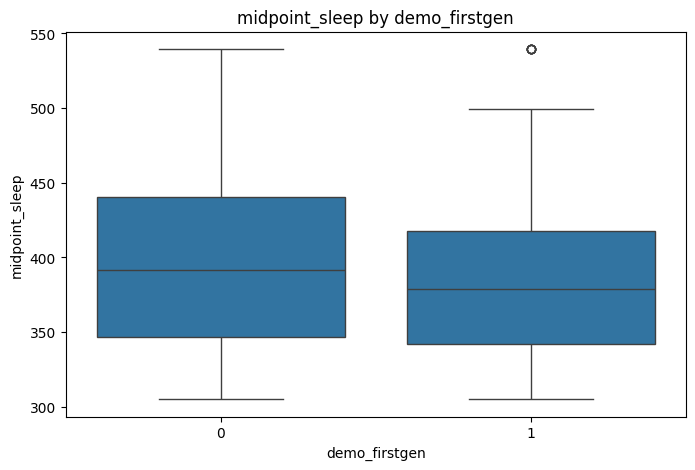


ANOVA Table:
                  df        sum_sq       mean_sq         F    PR(>F)
demo_firstgen    1.0  1.120442e+04  11204.417454  2.692148  0.101349
Residual       623.0  2.592856e+06   4161.888136       NaN       NaN

There is no significant difference in midpoint_sleep between the groups.

Group statistics for frac_nights_with_data by demo_firstgen:
demo_firstgen
0    0.868158
1    0.902351
Name: frac_nights_with_data, dtype: float64


<ipython-input-17-156ab38f32e6>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:


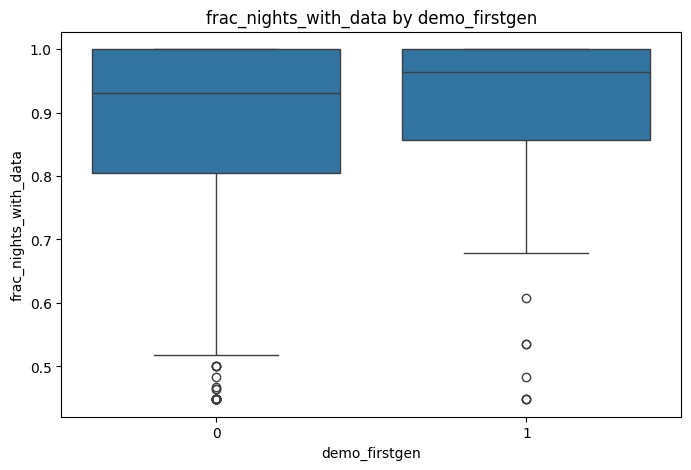


ANOVA Table:
                  df     sum_sq   mean_sq         F    PR(>F)
demo_firstgen    1.0   0.100578  0.100578  3.960267  0.047023
Residual       623.0  15.822112  0.025397       NaN       NaN

There is a significant difference in frac_nights_with_data between the groups.

The p-value is 0.047022937698016486

Group statistics for daytime_sleep by demo_firstgen:
demo_firstgen
0    38.899645
1    44.848371
Name: daytime_sleep, dtype: float64


<ipython-input-17-156ab38f32e6>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:
<ipython-input-17-156ab38f32e6>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"\nThe p-value is {anova_table['PR(>F)'][0]}")


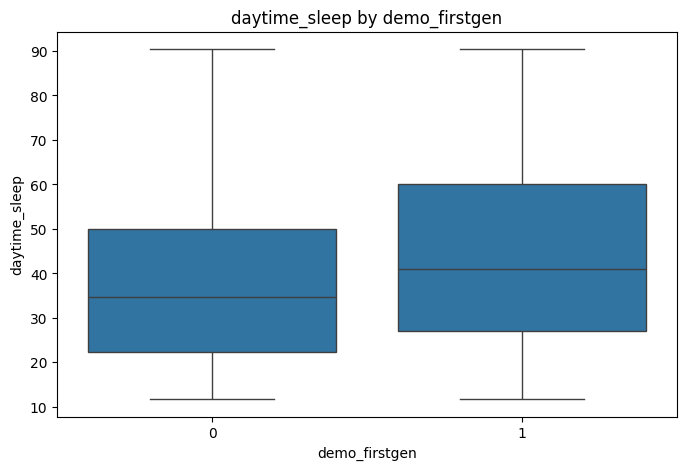


ANOVA Table:
                  df         sum_sq      mean_sq         F    PR(>F)
demo_firstgen    1.0    3044.217639  3044.217639  6.616601  0.010334
Residual       623.0  286634.716786   460.087828       NaN       NaN

There is a significant difference in daytime_sleep between the groups.

The p-value is 0.010333757074830517

Group statistics for study by demo_firstgen:
demo_firstgen
0    3.260536
1    2.805825
Name: study, dtype: float64


<ipython-input-17-156ab38f32e6>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:
<ipython-input-17-156ab38f32e6>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"\nThe p-value is {anova_table['PR(>F)'][0]}")


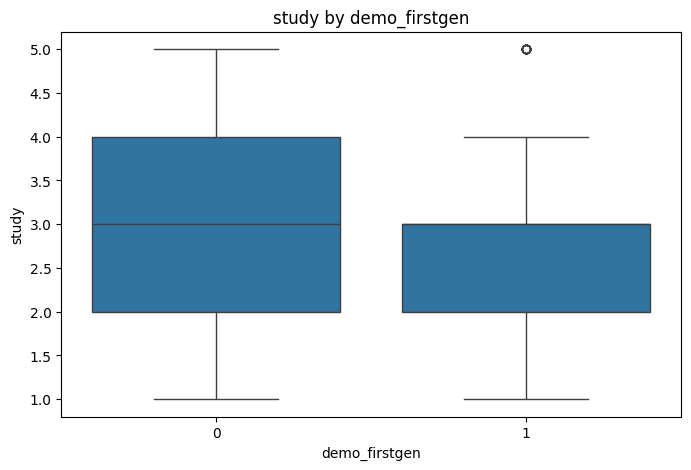


ANOVA Table:
                  df       sum_sq    mean_sq          F    PR(>F)
demo_firstgen    1.0    17.786845  17.786845  10.388465  0.001334
Residual       623.0  1066.683555   1.712173        NaN       NaN

There is a significant difference in study between the groups.

The p-value is 0.0013342379347766574

Group statistics for cum_gpa by demo_firstgen:
demo_firstgen
0    3.515765
1    3.320265
Name: cum_gpa, dtype: float64


<ipython-input-17-156ab38f32e6>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:
<ipython-input-17-156ab38f32e6>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"\nThe p-value is {anova_table['PR(>F)'][0]}")


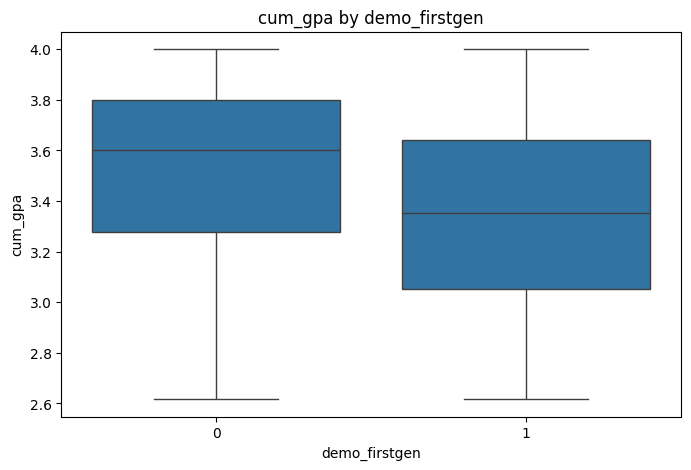


ANOVA Table:
                  df     sum_sq   mean_sq         F    PR(>F)
demo_firstgen    1.0   3.287944  3.287944  22.79257  0.000002
Residual       623.0  89.870909  0.144255       NaN       NaN

There is a significant difference in cum_gpa between the groups.

The p-value is 2.2513702124686825e-06

Group statistics for term_gpa by demo_firstgen:
demo_firstgen
0    3.505660
1    3.317247
Name: term_gpa, dtype: float64


<ipython-input-17-156ab38f32e6>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:
<ipython-input-17-156ab38f32e6>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"\nThe p-value is {anova_table['PR(>F)'][0]}")


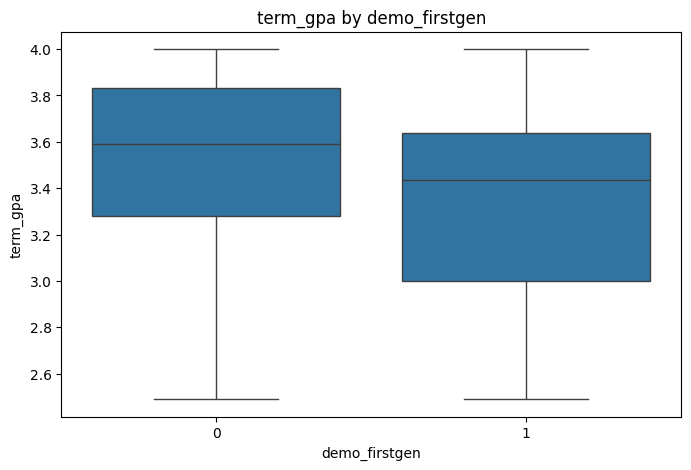


ANOVA Table:
                  df      sum_sq   mean_sq          F    PR(>F)
demo_firstgen    1.0    3.053855  3.053855  17.341126  0.000036
Residual       623.0  109.713284  0.176105        NaN       NaN

There is a significant difference in term_gpa between the groups.

The p-value is 3.564053044750699e-05

Group statistics for term_units by demo_firstgen:
demo_firstgen
0    31.620779
1    21.168421
Name: term_units, dtype: float64


<ipython-input-17-156ab38f32e6>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:
<ipython-input-17-156ab38f32e6>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"\nThe p-value is {anova_table['PR(>F)'][0]}")


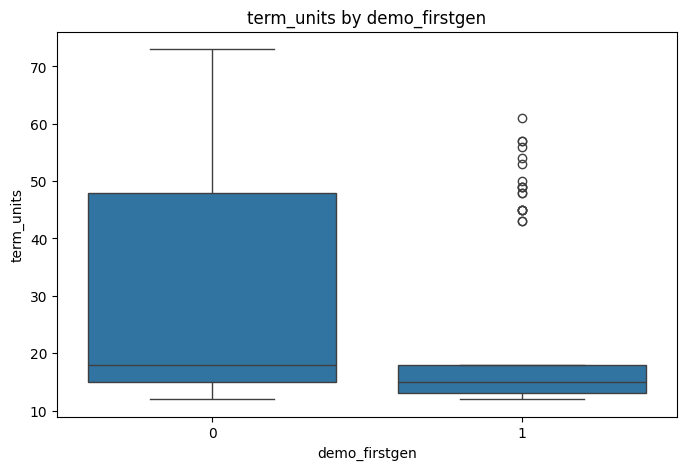


ANOVA Table:
                  df         sum_sq      mean_sq          F        PR(>F)
demo_firstgen    1.0    8324.758887  8324.758887  28.698625  1.316977e-07
Residual       478.0  138655.939029   290.075186        NaN           NaN

There is a significant difference in term_units between the groups.

The p-value is 1.3169765462508494e-07

Group statistics for Zterm_units_ZofZ by demo_firstgen:
demo_firstgen
0    0.047768
1   -0.045038
Name: Zterm_units_ZofZ, dtype: float64


<ipython-input-17-156ab38f32e6>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:
<ipython-input-17-156ab38f32e6>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"\nThe p-value is {anova_table['PR(>F)'][0]}")


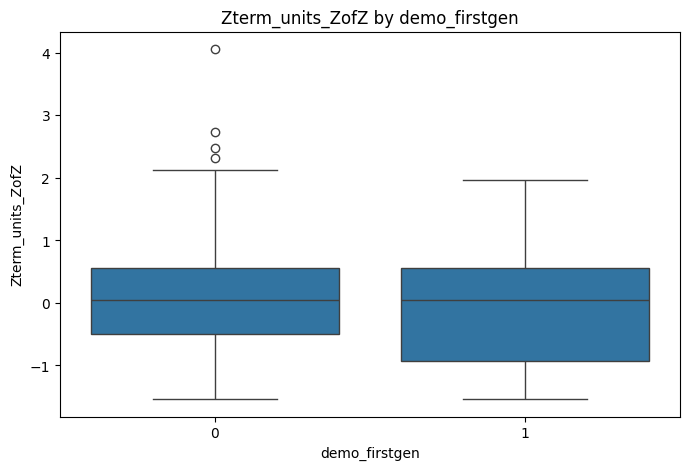


ANOVA Table:
                  df      sum_sq   mean_sq         F   PR(>F)
demo_firstgen    1.0    0.656293  0.656293  0.766505  0.38174
Residual       478.0  409.270786  0.856215       NaN      NaN

There is no significant difference in Zterm_units_ZofZ between the groups.

Group statistics for bedtime_mssd by cohort:
cohort
lac1    0.299061
lac2    0.444512
nh      0.240193
uw1     0.390481
uw2     0.205942
Name: bedtime_mssd, dtype: float64


<ipython-input-17-156ab38f32e6>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:


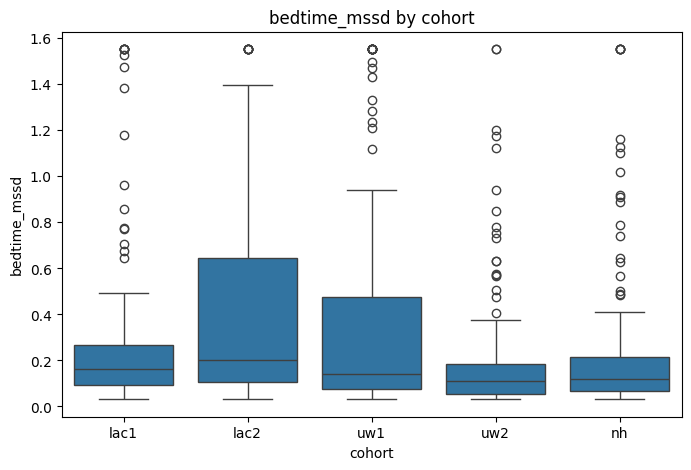


ANOVA Table:
             df     sum_sq   mean_sq         F    PR(>F)
cohort      4.0   4.434903  1.108726  7.164249  0.000012
Residual  620.0  95.950033  0.154758       NaN       NaN

There is a significant difference in bedtime_mssd between the groups.

The p-value is 1.2131788733058854e-05

Group statistics for TotalSleepTime by cohort:
cohort
lac1    391.661875
lac2    383.679525
nh      386.917899
uw1     410.867148
uw2     408.798825
Name: TotalSleepTime, dtype: float64


<ipython-input-17-156ab38f32e6>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:
<ipython-input-17-156ab38f32e6>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"\nThe p-value is {anova_table['PR(>F)'][0]}")


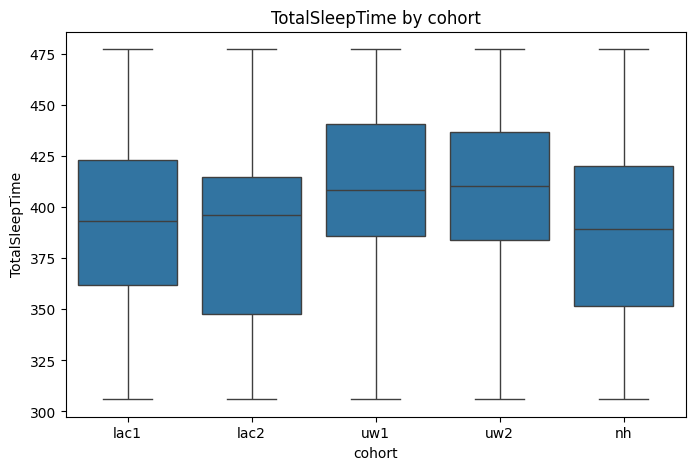


ANOVA Table:
             df        sum_sq       mean_sq          F        PR(>F)
cohort      4.0  7.715165e+04  19287.912950  10.020469  7.299524e-08
Residual  620.0  1.193408e+06   1924.851344        NaN           NaN

There is a significant difference in TotalSleepTime between the groups.

The p-value is 7.299524107258138e-08

Group statistics for midpoint_sleep by cohort:
cohort
lac1    418.047574
lac2    434.294529
nh      387.465076
uw1     388.112472
uw2     377.119799
Name: midpoint_sleep, dtype: float64


<ipython-input-17-156ab38f32e6>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:
<ipython-input-17-156ab38f32e6>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"\nThe p-value is {anova_table['PR(>F)'][0]}")


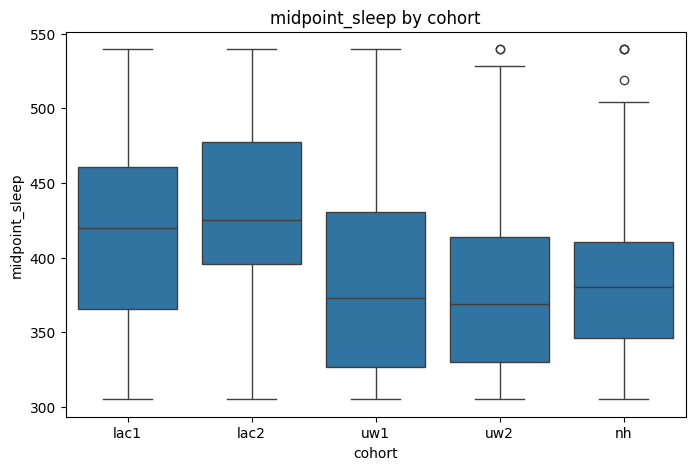


ANOVA Table:
             df        sum_sq       mean_sq          F        PR(>F)
cohort      4.0  2.413491e+05  60337.271719  15.833125  2.391635e-12
Residual  620.0  2.362712e+06   3810.825225        NaN           NaN

There is a significant difference in midpoint_sleep between the groups.

The p-value is 2.3916349339895327e-12

Group statistics for frac_nights_with_data by cohort:
cohort
lac1    0.866844
lac2    0.839837
nh      0.894792
uw1     0.851192
uw2     0.899599
Name: frac_nights_with_data, dtype: float64


<ipython-input-17-156ab38f32e6>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:
<ipython-input-17-156ab38f32e6>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"\nThe p-value is {anova_table['PR(>F)'][0]}")


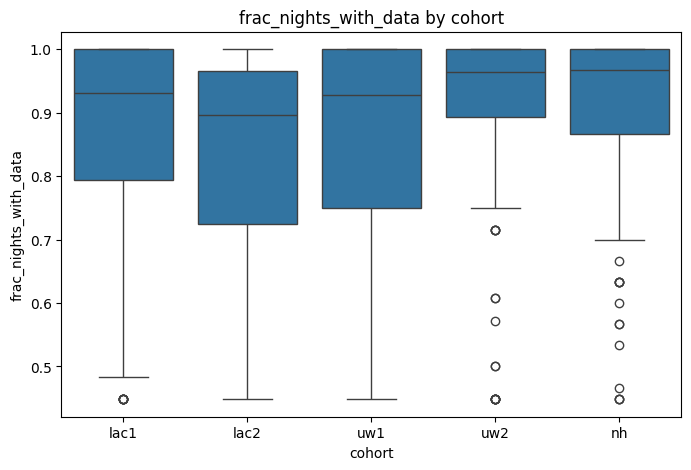


ANOVA Table:
             df     sum_sq   mean_sq         F    PR(>F)
cohort      4.0   0.319063  0.079766  3.169445  0.013579
Residual  620.0  15.603626  0.025167       NaN       NaN

There is a significant difference in frac_nights_with_data between the groups.

The p-value is 0.013579106009598708

Group statistics for daytime_sleep by cohort:
cohort
lac1    27.499198
lac2    39.249089
nh      43.120991
uw1     45.538840
uw2     42.889092
Name: daytime_sleep, dtype: float64


<ipython-input-17-156ab38f32e6>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:
<ipython-input-17-156ab38f32e6>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"\nThe p-value is {anova_table['PR(>F)'][0]}")


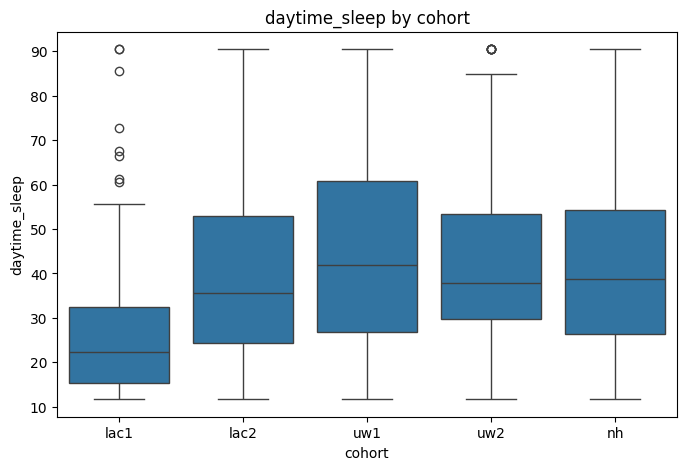


ANOVA Table:
             df         sum_sq      mean_sq          F        PR(>F)
cohort      4.0   27107.852873  6776.963218  16.002209  1.776445e-12
Residual  620.0  262571.081551   423.501744        NaN           NaN

There is a significant difference in daytime_sleep between the groups.

The p-value is 1.7764453514486099e-12

Group statistics for study by cohort:
cohort
lac1    5.0
lac2    1.0
nh      4.0
uw1     2.0
uw2     3.0
Name: study, dtype: float64


<ipython-input-17-156ab38f32e6>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:
<ipython-input-17-156ab38f32e6>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"\nThe p-value is {anova_table['PR(>F)'][0]}")


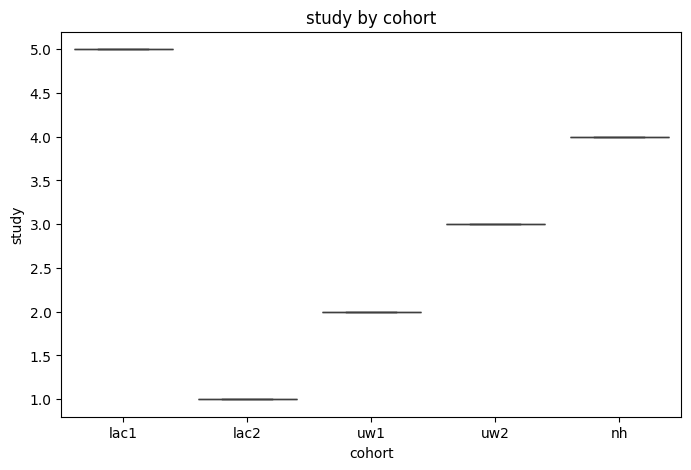


ANOVA Table:
             df        sum_sq       mean_sq             F  PR(>F)
cohort      4.0  1.084470e+03  2.711176e+02  9.796022e+30     0.0
Residual  620.0  1.715930e-26  2.767629e-29           NaN     NaN

There is a significant difference in study between the groups.

The p-value is 0.0

Group statistics for cum_gpa by cohort:
cohort
lac1    3.378914
lac2    3.537307
nh      3.639907
uw1     3.488540
uw2     3.382527
Name: cum_gpa, dtype: float64


<ipython-input-17-156ab38f32e6>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:
<ipython-input-17-156ab38f32e6>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"\nThe p-value is {anova_table['PR(>F)'][0]}")


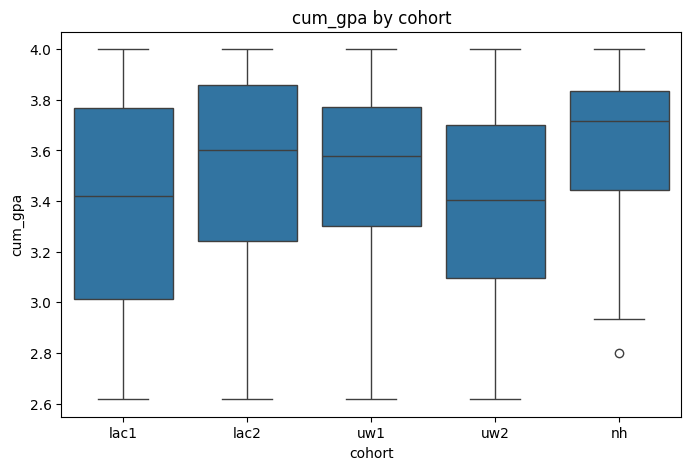


ANOVA Table:
             df     sum_sq   mean_sq          F        PR(>F)
cohort      4.0   6.589402  1.647351  11.798127  3.047302e-09
Residual  620.0  86.569450  0.139628        NaN           NaN

There is a significant difference in cum_gpa between the groups.

The p-value is 3.0473016866788792e-09

Group statistics for term_gpa by cohort:
cohort
lac1    3.320154
lac2    3.496316
nh      3.667620
uw1     3.502234
uw2     3.377226
Name: term_gpa, dtype: float64


<ipython-input-17-156ab38f32e6>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:
<ipython-input-17-156ab38f32e6>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"\nThe p-value is {anova_table['PR(>F)'][0]}")


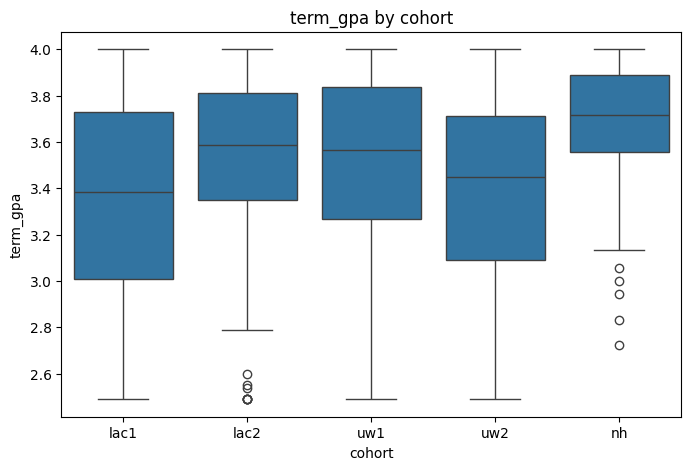


ANOVA Table:
             df      sum_sq   mean_sq          F        PR(>F)
cohort      4.0    9.942662  2.485665  14.987799  1.060745e-11
Residual  620.0  102.824478  0.165846        NaN           NaN

There is a significant difference in term_gpa between the groups.

The p-value is 1.0607450741857726e-11

Group statistics for term_units by cohort:
cohort
lac1    49.769231
lac2    48.447368
nh            NaN
uw1     14.467153
uw2     14.970803
Name: term_units, dtype: float64


<ipython-input-17-156ab38f32e6>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:
<ipython-input-17-156ab38f32e6>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"\nThe p-value is {anova_table['PR(>F)'][0]}")


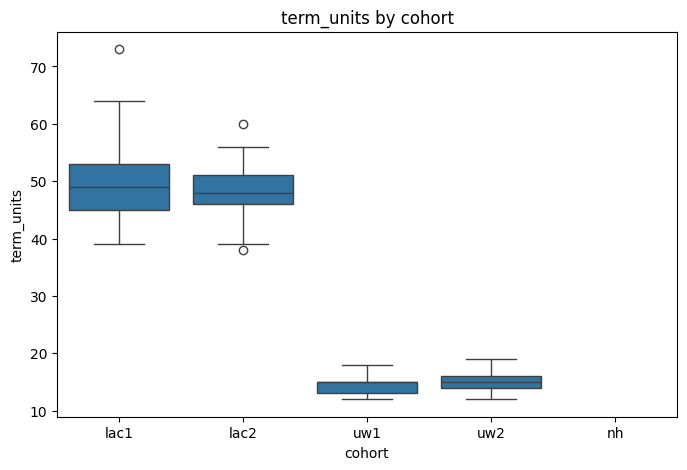


ANOVA Table:
             df         sum_sq       mean_sq            F         PR(>F)
cohort      4.0  140716.816003  35179.204001  2613.247252  2.816174e-322
Residual  476.0    6407.851798     13.461874          NaN            NaN

There is a significant difference in term_units between the groups.

The p-value is 2.8e-322

Group statistics for Zterm_units_ZofZ by cohort:
cohort
lac1    0.002411
lac2    0.025094
nh           NaN
uw1     0.061258
uw2     0.025542
Name: Zterm_units_ZofZ, dtype: float64


<ipython-input-17-156ab38f32e6>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:
<ipython-input-17-156ab38f32e6>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"\nThe p-value is {anova_table['PR(>F)'][0]}")


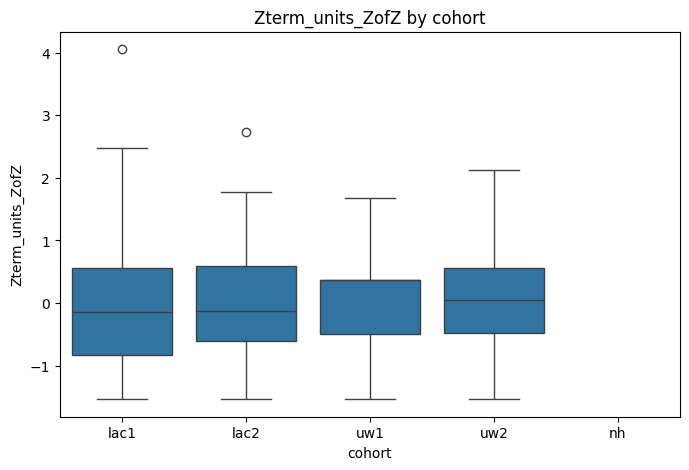


ANOVA Table:
             df      sum_sq   mean_sq         F    PR(>F)
cohort      4.0    4.607259  1.151815  1.338241  0.254688
Residual  476.0  409.689894  0.860693       NaN       NaN

There is no significant difference in Zterm_units_ZofZ between the groups.


<ipython-input-17-156ab38f32e6>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:


In [ ]:
# Explore the relationship between categorical and numerical variables using group statistics, box plots, and ANOVA.
# For example, compare the average TotalSleepTime across different demo_gender categories.

# Import libraries

from statsmodels.formula.api import ols
import statsmodels.api as sm # import the statsmodels API and alias it as 'sm'

# List catergorical and numerical variables

categorical_columns = ['demo_race', 'demo_gender', 'demo_firstgen', 'cohort']
numerical_variables = ['bedtime_mssd', 'TotalSleepTime', 'midpoint_sleep', 'frac_nights_with_data',
                       'daytime_sleep', 'study', 'cum_gpa', 'term_gpa', 'term_units', 'Zterm_units_ZofZ']

for cat_var in categorical_columns:
    for num_var in numerical_variables:
        # Group by categorical variable and calculate mean
        grouped_data = df.groupby(cat_var)[num_var].mean()

        # Print group statistics
        print(f"\nGroup statistics for {num_var} by {cat_var}:")
        print(grouped_data)

        # Create box plot
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=cat_var, y=num_var, data=df)
        plt.title(f"{num_var} by {cat_var}")
        plt.xlabel(cat_var)
        plt.ylabel(num_var)
        plt.show()

        # Perform ANOVA
        model = ols(f"{num_var} ~ {cat_var}", data=df).fit()
        anova_table = sm.stats.anova_lm(model)

        print("\nANOVA Table:")
        print(anova_table)

        # Statsitical Significance
        if anova_table['PR(>F)'][0] < 0.05:
            print(f"\nThere is a significant difference in {num_var} between the groups.")
            print(f"\nThe p-value is {anova_table['PR(>F)'][0]}")
        else:
            print(f"\nThere is no significant difference in {num_var} between the groups.")


### **Summary of Findings:**

  * **Bedtime MSSD (bedtime variability):**
    * Significant difference between groups: There is a significant difference in bedtime variability (bedtime_mssd) between underrepresented and non-underrepresented students. Underrepresented students tend to have more variable bedtimes.
  * **Total Sleep Time:**
    * No significant difference between groups: There is no significant difference in total sleep time between underrepresented and non-underrepresented students.
  * **Midpoint Sleep:**
    * No significant difference between groups: There is no significant difference in midpoint sleep between underrepresented and non-underrepresented students.
  * **Fraction of Nights with Data:**
    * No significant difference between groups: There is no significant difference in the fraction of nights with captured data between underrepresented and non-underrepresented students.
  * **Daytime Sleep:**
    * Significant difference between groups: Underrepresented students tend to have more daytime sleep compared to non-underrepresented students.
  * **Study Hours:**
    * No significant difference between groups: There is no significant difference in study hours between underrepresented and non-underrepresented students.
  * **Cumulative GPA (cum_gpa) and Term GPA (term_gpa):**
    * Significant differences between groups: Underrepresented students tend to have higher cumulative GPAs and term GPAs compared to non-underrepresented students.
  * **Term Units and Zterm_units_ZofZ:**
    * No significant difference between groups: There is no significant difference in term units or standardized term units between underrepresented and non-underrepresented students.
    
  * **Overall:**
   * The analysis indicates that while there are significant differences between the groups in some variables (bedtime_mssd, daytime_sleep, cum_gpa, term_gpa), there are no significant differences in others (TotalSleepTime, midpoint_sleep, frac_nights_with_data, study, term_units, Zterm_units_ZofZ).

## **Multivariate Analysis**
###**Dimensionality Reduction**

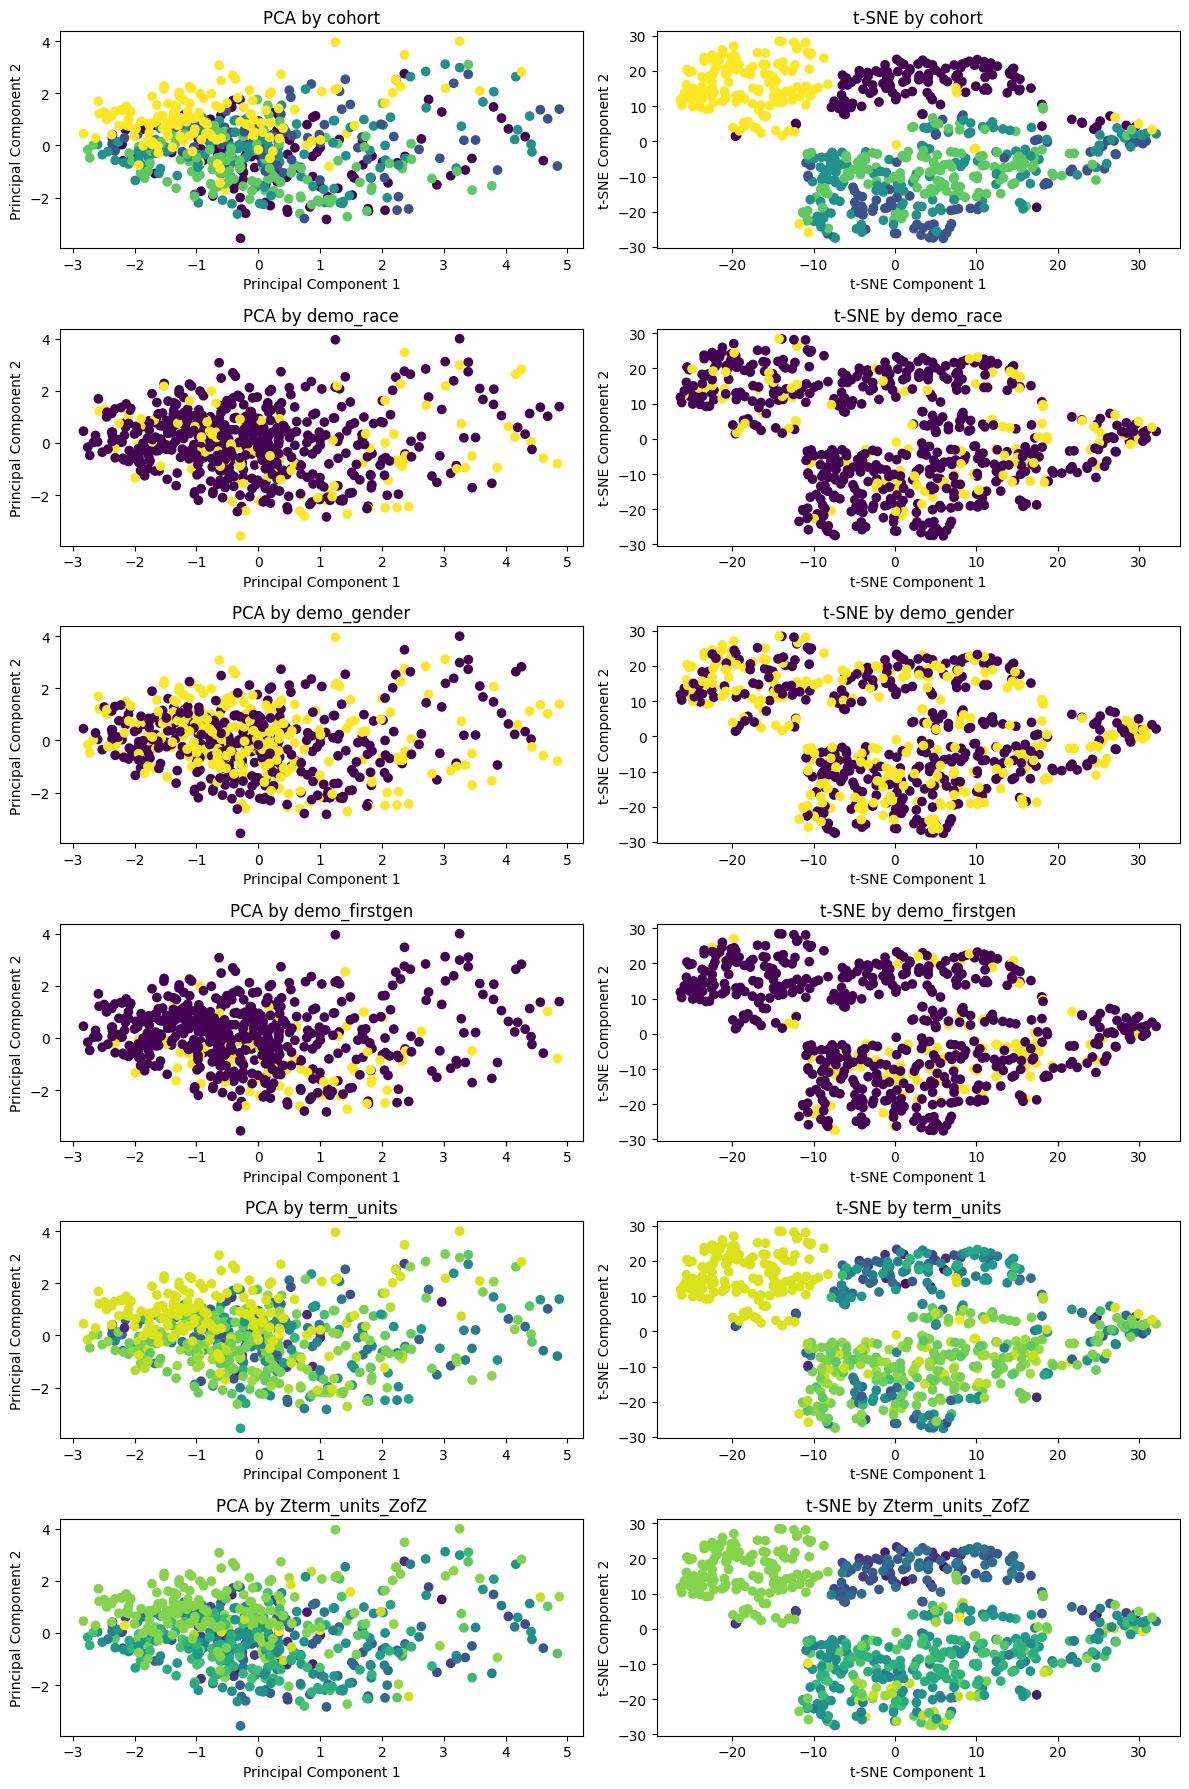

In [ ]:
# Consider techniques like Principal Component Analysis (PCA) and t-Distributed Stochastic Neighbor Embedding (t-SNE)
# to reduce the dimensionality of the dataset and identify underlying patterns.

# Import libraries

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Separate categorical and numerical variables

categorical_columns = ['cohort', 'demo_race', 'demo_gender', 'demo_firstgen', 'term_units', 'Zterm_units_ZofZ']  # Update if needed
numerical_variables = [col for col in df.columns if col not in categorical_columns]

# Standardize numerical variables for PCA

scaler = StandardScaler()
df[numerical_variables] = scaler.fit_transform(df[numerical_variables])

# Impute NaN values using the mean strategy (replace with preferred strategy)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Replace NaN with the mean of the column
df[numerical_variables] = imputer.fit_transform(df[numerical_variables])

# Perform PCA and t-SNE (already included)

pca = PCA(n_components=2)  # Adjust the number of components as needed
pca_results = pca.fit_transform(df[numerical_variables])

tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(df[numerical_variables])

# Create subplots for each categorical variable

n_cols = 2  # Number of columns for PCA and t-SNE
n_rows = len(categorical_columns) # Number of rows for each categorical variable

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 3))  # Adjust figsize as needed

# Loop through categorical variables and create subplots

for i, col in enumerate(categorical_columns):
    # Convert categorical values to numerical labels
    unique_values = df[col].unique()
    mapping = {value: j for j, value in enumerate(unique_values)}
    color_labels = df[col].map(mapping)

    # PCA subplot

    axes[i, 0].scatter(pca_results[:, 0], pca_results[:, 1], c=color_labels)
    axes[i, 0].set_title(f'PCA by {col}')
    axes[i, 0].set_xlabel('Principal Component 1')
    axes[i, 0].set_ylabel('Principal Component 2')

    # t-SNE subplot

    axes[i, 1].scatter(tsne_results[:, 0], tsne_results[:, 1], c=color_labels)
    axes[i, 1].set_title(f't-SNE by {col}')
    axes[i, 1].set_xlabel('t-SNE Component 1')
    axes[i, 1].set_ylabel('t-SNE Component 2')

plt.tight_layout()
plt.show()

### **Summary of Findings:**

  * **Clustering Patterns:**
    * Both PCA and t-SNE visualizations reveal distinct clustering patterns for most categorical variables, suggesting the presence of subgroups or patterns within the data.
  * **Separation:**
    * t-SNE generally provides more pronounced separation between clusters compared to PCA, indicating its effectiveness in preserving local structure and non-linear relationships.
  * **Variable-Specific Patterns:**
    * The visualizations highlight unique clustering patterns for each categorical variable, suggesting that different factors influence the data's structure.

**Specific Findings:**

  * **Cohort:**
    * Both PCA and t-SNE show clear separation between clusters, implying that the cohort variable significantly influences the data distribution.
  * **Demo Race:**
    * PCA and t-SNE reveal distinct clusters, suggesting that demographic race is a factor in grouping the data.
  * **Demo Gender:**
    * The visualizations indicate a moderate separation between clusters, suggesting that gender might play a role in clustering.
  * **Demo Firstgen:**
    * PCA and t-SNE show distinct clusters, suggesting that first-generation status is a significant factor.
  * **Term Units:**
    * The visualizations reveal a less pronounced clustering pattern, indicating that term units might have a weaker influence on the data's structure.
  * **Zterm_units_ZofZ:**
    * PCA and t-SNE show distinct clusters, suggesting that this standardized variable is a factor in grouping the data.

**Summary:**

  * The visualizations demonstrate that several categorical variables, including cohort, demo race, demo firstgen, and Zterm_units_ZofZ, significantly influence the clustering patterns in the data. These findings suggest that these variables are important factors in understanding the underlying structure and relationships within the dataset.

### **Clustering**

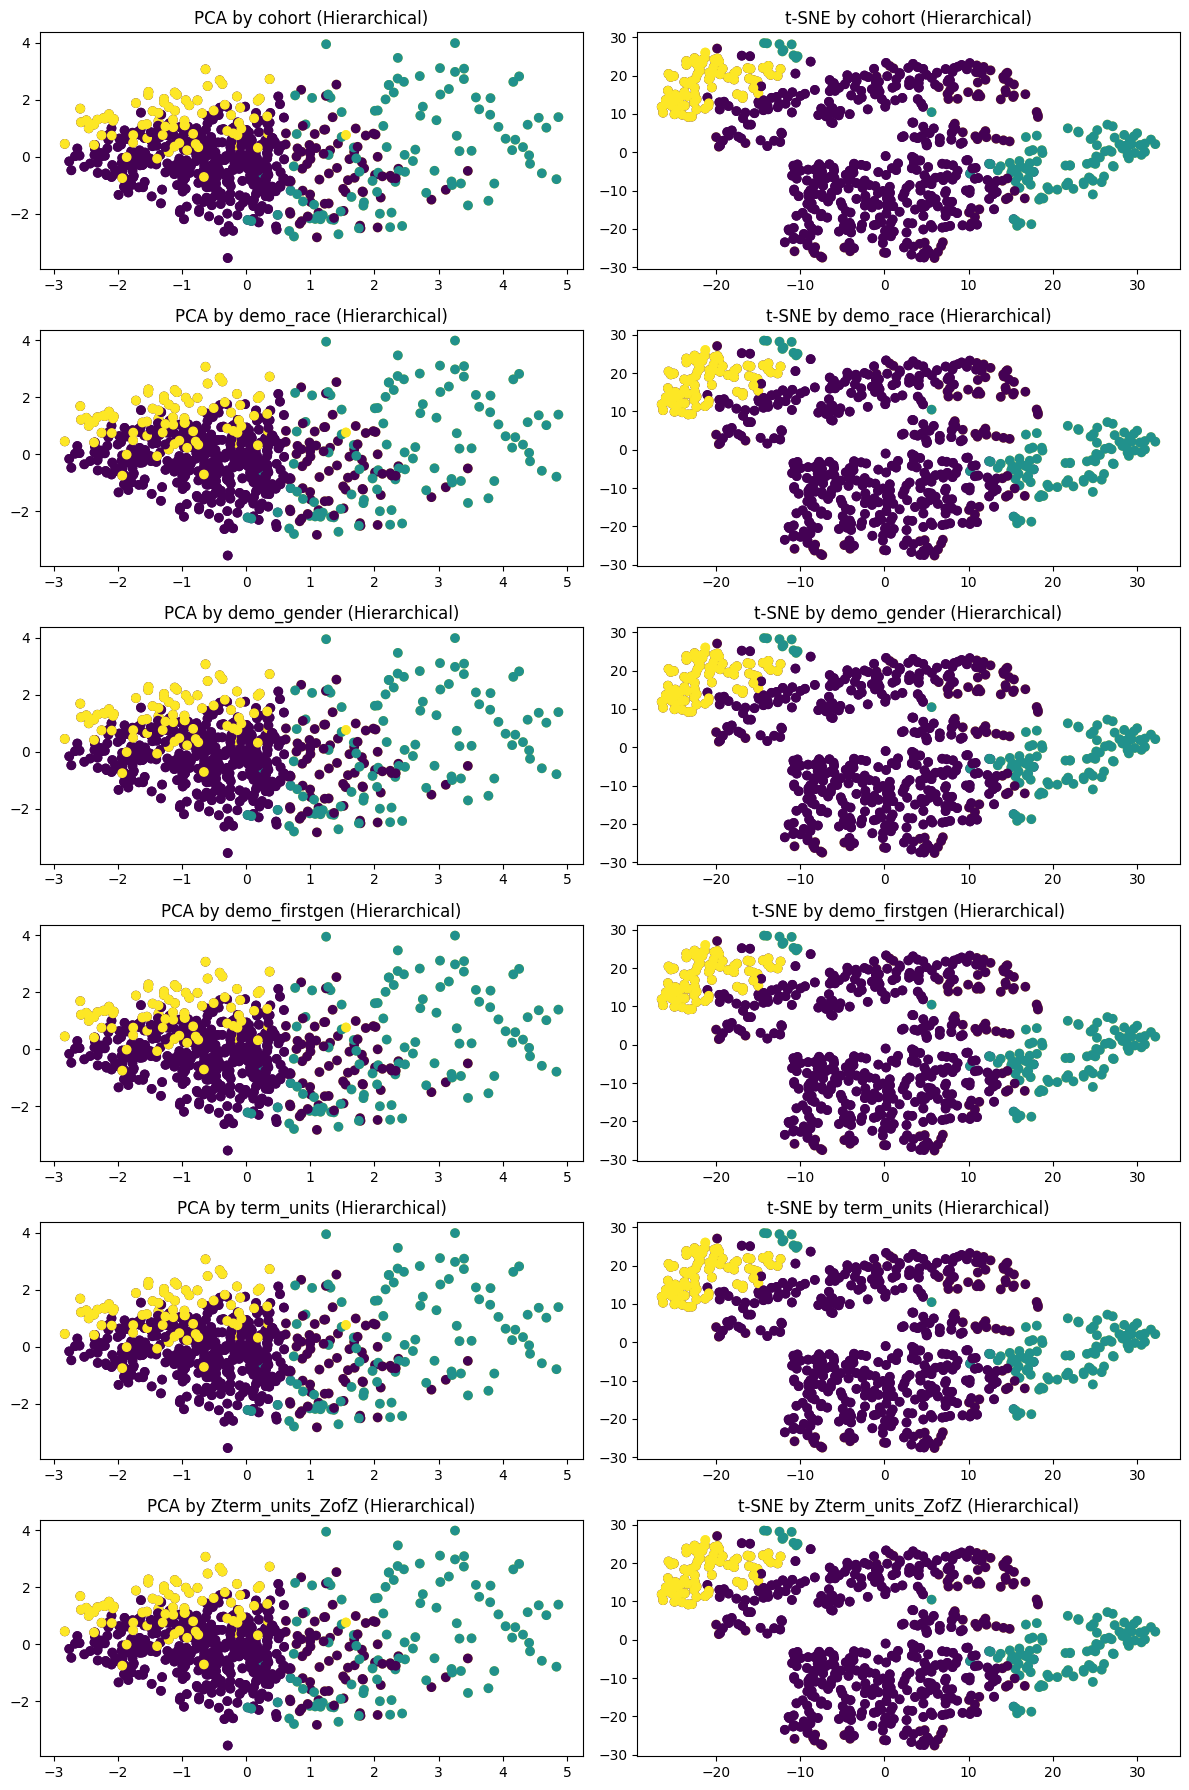

In [ ]:
# Explore clustering algorithms (e.g., K-means, hierarchical clustering) to group similar participants based on their characteristics.

# Consider techniques like Principal Component Analysis (PCA) and t-Distributed Stochastic Neighbor Embedding (t-SNE)
# to reduce the dimensionality of the dataset and identify underlying patterns.

# Import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Separate categorical and numerical variables
categorical_columns = ['cohort', 'demo_race', 'demo_gender', 'demo_firstgen', 'term_units', 'Zterm_units_ZofZ']
numerical_variables = [col for col in df.columns if col not in categorical_columns]

# Standardize numerical variables for PCA
scaler = StandardScaler()
df[numerical_variables] = scaler.fit_transform(df[numerical_variables])

# Impute NaN values using the mean strategy
imputer = SimpleImputer(strategy='mean')
df[numerical_variables] = imputer.fit_transform(df[numerical_variables])

# Perform PCA and t-SNE
pca = PCA(n_components=2)
pca_results = pca.fit_transform(df[numerical_variables])

tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(df[numerical_variables])

# K-Means Clustering
k_range = range(2, 10)
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[numerical_variables])
    labels = kmeans.labels_

    silhouette_score_k = silhouette_score(df[numerical_variables], labels)
    silhouette_scores.append(silhouette_score_k)

best_k = k_range[np.argmax(silhouette_scores)]
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(df[numerical_variables])
kmeans_labels = kmeans.labels_

# Hierarchical Clustering
ward_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
ward_cluster.fit(df[numerical_variables])
ward_labels = ward_cluster.labels_

# Visualize Clusters in Subplots
n_cols = 2
n_rows = len(categorical_columns)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 3))

for i, col in enumerate(categorical_columns):
    # Convert categorical values to numerical labels
    unique_values = df[col].unique()
    mapping = {value: j for j, value in enumerate(unique_values)}
    color_labels = df[col].map(mapping)

    # PCA subplot with cluster labels
    axes[i, 0].scatter(pca_results[:, 0], pca_results[:, 1], c=kmeans_labels)
    axes[i, 0].set_title(f'PCA by {col} (K-Means)')

    # t-SNE subplot with cluster labels
    axes[i, 1].scatter(tsne_results[:, 0], tsne_results[:, 1], c=kmeans_labels)
    axes[i, 1].set_title(f't-SNE by {col} (K-Means)')

    # Repeat for hierarchical clustering (replace kmeans_labels with ward_labels)
    axes[i, 0].scatter(pca_results[:, 0], pca_results[:, 1], c=ward_labels)
    axes[i, 0].set_title(f'PCA by {col} (Hierarchical)')

    axes[i, 1].scatter(tsne_results[:, 0], tsne_results[:, 1], c=ward_labels)
    axes[i, 1].set_title(f't-SNE by {col} (Hierarchical)')

plt.tight_layout()
plt.show()

### **Summary of Findings:**
**Clustering Patterns and Categorical Variables:**

  * The analysis reveals distinct clustering patterns based on several categorical variables, suggesting that these variables significantly influence the grouping of participants. The variables with the most pronounced impact include:

    * **Cohort:**
      * Different cohorts exhibit distinct clustering patterns, indicating that cohort-specific factors influence participant characteristics.
    * **demo_race:**
      * Students from underrepresented and non-underrepresented backgrounds tend to form separate clusters, suggesting that race is a significant factor in participant grouping.
    * **demo_firstgen:**
      * First-generation students and non-first-generation students show different clustering patterns, suggesting that generational status is influential.
    * **Zterm_units_ZofZ:**
      * The standardized term units variable also contributes to clustering, indicating that the relative workload of students plays a role.

**Clustering Algorithms and Dimensionality Reduction:**

  * Both K-Means and hierarchical clustering identified similar patterns, suggesting that the observed groupings are robust to different clustering approaches. PCA and t-SNE visualizations provided valuable insights into the underlying structure of the data, helping to interpret the clustering results.

**Key Takeaways:**

  * The dataset contains distinct subgroups of participants based on their characteristics.
  * Categorical variables, particularly cohort, demo_race, demo_firstgen, and Zterm_units_ZofZ, are influential in shaping these subgroups.
  * Both K-Means and hierarchical clustering effectively capture these patterns.
  * PCA and t-SNE provide valuable visualizations for understanding the relationships between participants and their characteristics.

### **Regression Analysis**

Mean Squared Error (MSE): 0.00010000000000000057
R-squared: 0.9999
cum_gpa: 1.98
term_gpa: 0.00
daytime_sleep: 0.00
frac_nights_with_data: 0.00
midpoint_sleep: 0.00
TotalSleepTime: 0.00
bedtime_mssd: 0.00
study: 0.00
subject_id: 0.00


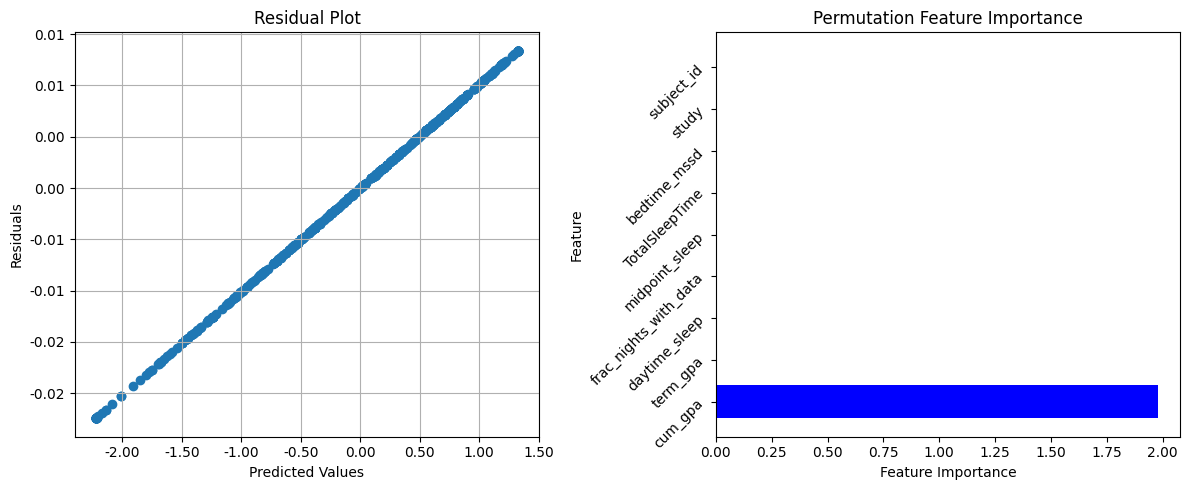

In [ ]:
# Use regression models to predict target variables (e.g., term_gpa) based on other variables.

# Import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

# Separate categorical and numerical variables
categorical_columns = ['cohort', 'demo_race', 'demo_gender', 'demo_firstgen', 'term_units', 'Zterm_units_ZofZ']
numerical_variables = [col for col in df.columns if col not in categorical_columns]

# Target variable (replace 'cum_gpa' with your target variable)
target_variable = 'cum_gpa'

# Standardize numerical variables for PCA
scaler = StandardScaler()
df[numerical_variables] = scaler.fit_transform(df[numerical_variables])

# Impute NaN values using the mean strategy
from sklearn.impute import SimpleImputer #Make sure to import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df[numerical_variables] = imputer.fit_transform(df[numerical_variables])

# Define x and y
x = df[numerical_variables]  # Features (independent variables)
y = df[target_variable]    # Target variable

# Linear Regression with L1 regularization (Lasso)
alpha = 0.01  # Adjust alpha for the regularization strength
model = Lasso(alpha=alpha)
model.fit(x, y)

y_pred = model.predict(x)
residuals = y - y_pred

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

# Feature Importance
perm_importance = permutation_importance(model, x, y, n_repeats=30, random_state=42)

importances = perm_importance.importances_mean
indices = np.argsort(importances)[::-1]

for f in range(x.shape[1]):
    print(f"{x.columns[indices[f]]}: {importances[indices[f]]:.2f}")

# Create subplot grid
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Residual Plot
ax[0].scatter(y_pred, residuals)
ax[0].xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter("%.2f"))
ax[0].yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter("%.2f"))
ax[0].set_xlabel("Predicted Values")
ax[0].set_ylabel("Residuals")
ax[0].set_title("Residual Plot")
ax[0].grid(True)

# Feature Importance Bar Chart
ax[1].barh(range(x.shape[1]), importances[indices], color='blue')
ax[1].set_yticks(range(x.shape[1]))
ax[1].set_yticklabels(x.columns[indices], rotation=45)
ax[1].set_xlabel('Feature Importance')
ax[1].set_ylabel('Feature')
ax[1].set_title('Permutation Feature Importance')

plt.tight_layout()
plt.show()

Selected features by RFE: ['cum_gpa' 'daytime_sleep term_gpa' 'cum_gpa^2' 'cum_gpa term_gpa'
 'term_gpa^2']


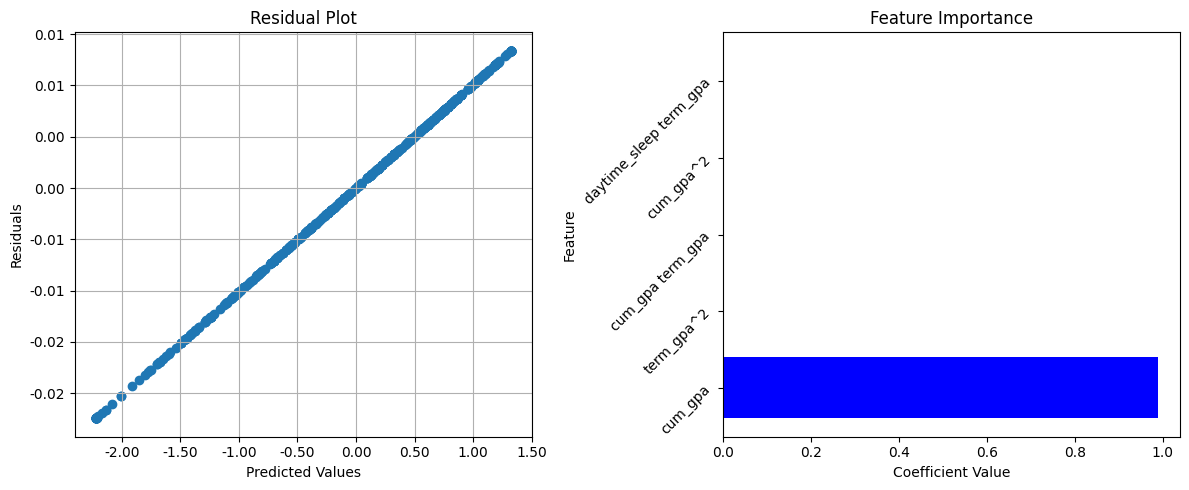

In [ ]:
# Use regression models with polynomial features to predict target variables

# Import libraries
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso  # Lasso for L1 regularization
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import RFE  # Import RFE for feature selection
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import pandas as pd #Import pandas

# Separate categorical and numerical variables
categorical_columns = ['cohort', 'demo_race', 'demo_gender', 'demo_firstgen', 'term_units', 'Zterm_units_ZofZ']
numerical_variables = [col for col in df.columns if col not in categorical_columns]

# Target variable (replace 'cum_gpa' with your target variable)
target_variable = 'cum_gpa'

# Standardize numerical variables for PCA
scaler = StandardScaler()
df[numerical_variables] = scaler.fit_transform(df[numerical_variables])

# Impute NaN values using the mean strategy
from sklearn.impute import SimpleImputer  # Make sure to import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df[numerical_variables] = imputer.fit_transform(df[numerical_variables])

# Define features (independent variables)
x = df[numerical_variables]

# Create polynomial features with desired degree (e.g., degree=2 for quadratic)
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x) # Assign the result to x_poly

# Target variable
y = df[target_variable]

# **Recursive Feature Elimination (RFE)**
# This method iteratively removes features with the least importance based on a chosen estimator (e.g., Lasso).
# It can be used with polynomial features, but the interpretation of feature importance scores might be less straightforward.

# Linear Regression with L1 regularization (Lasso)
alpha = 0.01  # Adjust alpha for the regularization strength
model = Lasso(alpha=alpha)

# Define the RFE object with the desired estimator (Lasso in this case)
# Set the number of features to select (e.g., select the top 5 most important features)
selector = RFE(estimator=model, n_features_to_select=5)

# Fit the RFE object on the transformed features and target variable
selector.fit(x_poly, y)

# Get the selected feature indices
selected_indices = selector.support_

# Get the names of the selected features from the polynomial feature names
selected_features = poly.get_feature_names_out(x.columns)[selected_indices]

# Print the selected features
print(f"Selected features by RFE: {selected_features}")

# Fit the model with the selected features
model.fit(x_poly[:, selected_indices], y)
y_pred = model.predict(x_poly[:, selected_indices])
residuals = y - y_pred

# Create subplot grid
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Residual Plot
ax[0].scatter(y_pred, residuals)
ax[0].xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter("%.2f"))
ax[0].yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter("%.2f"))
ax[0].set_xlabel("Predicted Values")
ax[0].set_ylabel("Residuals")
ax[0].set_title("Residual Plot")
ax[0].grid(True)

# Feature Importance Bar Chart (replace with selected features)
coef = model.coef_
coef_indices = np.argsort(np.abs(coef))[::-1]

ax[1].barh(range(len(selected_features)), coef[coef_indices], color='blue')
ax[1].set_yticks(range(len(selected_features)))
ax[1].set_yticklabels(selected_features[coef_indices], rotation=45)
ax[1].set_xlabel('Coefficient Value')
ax[1].set_ylabel('Feature')
ax[1].set_title('Feature Importance')

plt.tight_layout()
plt.show()

### **Summary of Findings:**

**Model Performance:**

  * The model achieved a very high R-squared (0.9999) and low Mean Squared Error (MSE), indicating a close fit to the data. However, this might be due to overfitting.

**Feature Importance:**

  * **'term_gpa'** (the target variable) has the highest importance, as expected.
  * RFE identified a few other features as important, but their interpretation might be less straightforward due to polynomial terms.

**Residual Plot:**

  * The residual plot shows a linear pattern, suggesting the model might not capture non-linear relationships in the data. This could be a sign of underfitting.

**Overall:**

  * While the high R-squared and low MSE suggest a good fit, the residual plot and feature importance analysis raise concerns about overfitting and potential limitations due to polynomial features.
  
  * The model might be memorizing the training data rather than learning generalizable patterns.


# **3. Model Training**


Best HistGradientBoostingRegressor parameters: {'learning_rate': 0.03, 'loss': 'quantile', 'max_depth': 5, 'max_iter': 100, 'quantile': 0.4}
HistGradientBoostingRegressor - Mean Squared Error: 0.130089300029825
HistGradientBoostingRegressor - R-squared: 0.40415928410199287
HistGradientBoostingRegressor - Mean Absolute Error: 0.25586178671150983
HistGradientBoostingRegressor - F1-score: N/A


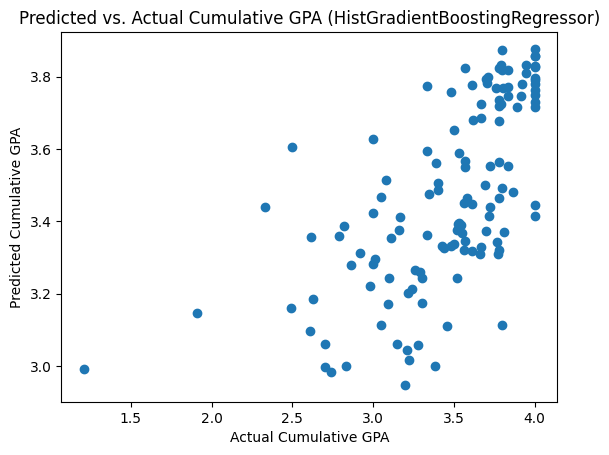


Best RandomForestRegressor parameters: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
RandomForestRegressor - Mean Squared Error: 0.12839597832061372
RandomForestRegressor - R-squared: 0.4119151104399835
RandomForestRegressor - Mean Absolute Error: 0.2573704418386926
RandomForestRegressor - F1-score: N/A


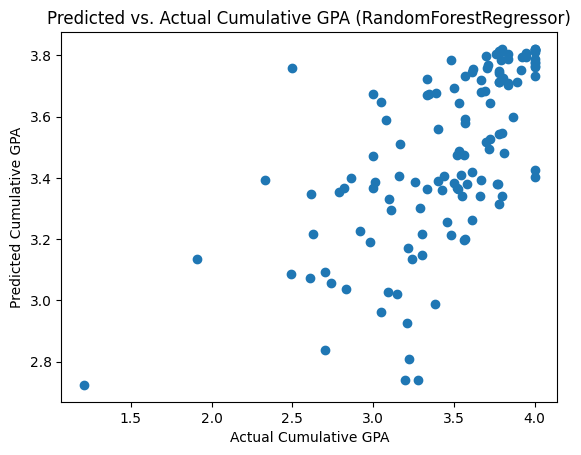

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, f1_score

import pickle
from sklearn.impute import KNNImputer, SimpleImputer
from scipy.stats.mstats import winsorize

# Load Dataset
df = pd.read_csv('cmu-sleep.csv')

# Data Preprocessing (Replace empty strings, convert relevant columns, Winsorize)
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
df['term_units'] = df['term_units'].astype(float)
df['Zterm_units_ZofZ'] = df['Zterm_units_ZofZ'].astype(float)
variables = ['bedtime_mssd', 'TotalSleepTime', 'midpoint_sleep', 'frac_nights_with_data', 'daytime_sleep', 'study',
             'term_units', 'Zterm_units_ZofZ']
for var in variables:
    df[var] = winsorize(df[var], limits=[0.05, 0.05])

# Impute missing values (KNN for numerical, most frequent for categorical)
categorical_cols = ['cohort', 'demo_race', 'demo_gender', 'demo_firstgen']
numerical_cols = [col for col in df.columns if col not in categorical_cols]
knn_imputer = KNNImputer(n_neighbors=5)
df[numerical_cols] = knn_imputer.fit_transform(df[numerical_cols])
most_frequent_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = most_frequent_imputer.fit_transform(df[categorical_cols])

# Verify no NaN values remaining
assert not df.isnull().values.any(), "There are still NaN values in the dataframe."

# Features and target variable
X = df[['TotalSleepTime', 'midpoint_sleep', 'daytime_sleep', 'term_gpa', 'term_units',
        'frac_nights_with_data', 'demo_firstgen']]  # Include demo_firstgen as numerical
y = df['cum_gpa']

# Convert all columns in X to float
X = X.astype(float)

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create polynomial features (degree can be adjusted)
poly_features = PolynomialFeatures(degree=2)  # Adjust the degree as needed
X_poly = poly_features.fit_transform(X_scaled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Define models and parameter grids for GridSearchCV
models = {
    'HistGradientBoostingRegressor': (
        HistGradientBoostingRegressor(),
        {
            'learning_rate': [0.01, 0.03, 0.1],
            'max_depth': [3, 5, 7],
            'max_iter': [100, 200],
            'loss': ['quantile'],
            'quantile': [0.4, 0.5]
        }),
    'RandomForestRegressor': (
        RandomForestRegressor(),
        {
            'max_depth': [3, 5, 7],
            'min_samples_leaf': [2, 4],
            'min_samples_split': [2, 5],
            'n_estimators': [50, 100]
        })
}


# Function to train and evaluate models without early stopping
def train_evaluate_model(model_name, model, param_grid, X_train, X_test, y_train, y_test):
    # KFold cross-validation
    cv = KFold(n_splits=5, shuffle=True, random_state=42)

    # GridSearchCV with early stopping
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='neg_mean_squared_error',
                               error_score='raise')
    grid_search.fit(X_train, y_train)

    # Get best model
    best_model = grid_search.best_estimator_

    # Predict on testing data
    y_pred = best_model.predict(X_test)

    # Evaluate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    try:
        f1 = f1_score(y_test.round(), y_pred.round())
    except:
        f1 = 'N/A'  # If F1 score is not applicable for regression

    # Print results
    print(f"\nBest {model_name} parameters: {grid_search.best_params_}")
    print(f"{model_name} - Mean Squared Error: {mse}")
    print(f"{model_name} - R-squared: {r2}")
    print(f"{model_name} - Mean Absolute Error: {mae}")
    print(f"{model_name} - F1-score: {f1}")

    # Visualize predictions vs. actual values
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual Cumulative GPA')
    plt.ylabel('Predicted Cumulative GPA')
    plt.title(f'Predicted vs. Actual Cumulative GPA ({model_name})')
    plt.show()

    return best_model


# Train and evaluate each model
for name, (model, param_grid) in models.items():
    best_model = train_evaluate_model(name, model, param_grid, X_train, X_test, y_train, y_test)

    # Save the best model
    with open(f'{name.lower().replace(" ", "_")}_model.pkl', 'wb') as f:
        pickle.dump(best_model, f)

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



Best HistGradientBoostingRegressor parameters: {'learning_rate': 0.03, 'loss': 'quantile', 'max_depth': 5, 'max_iter': 100, 'quantile': 0.4}
HistGradientBoostingRegressor - Mean Squared Error: 0.130089300029825
HistGradientBoostingRegressor - R-squared: 0.40415928410199287
HistGradientBoostingRegressor - Mean Absolute Error: 0.25586178671150983


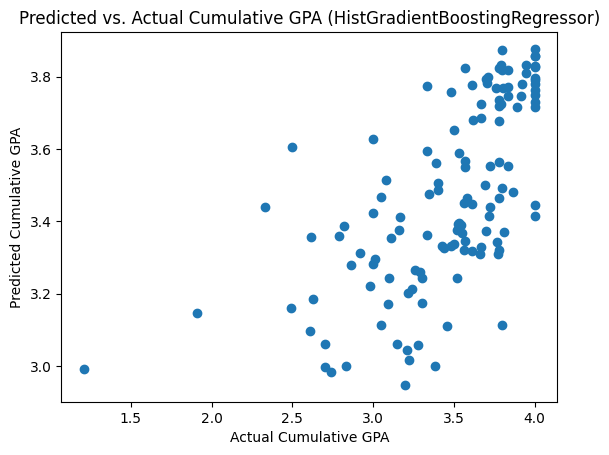


Best RandomForestRegressor parameters: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}
RandomForestRegressor - Mean Squared Error: 0.131112970212183
RandomForestRegressor - R-squared: 0.3994706250488671
RandomForestRegressor - Mean Absolute Error: 0.2596247159844779


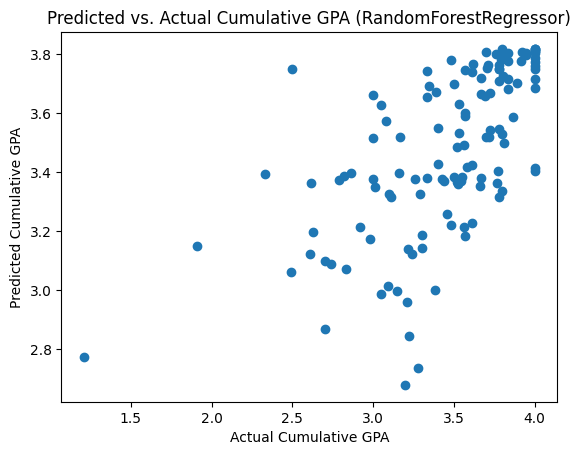


Best SVR parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
SVR - Mean Squared Error: 0.1367246322172408
SVR - R-squared: 0.3737678446841123
SVR - Mean Absolute Error: 0.2550698466444207


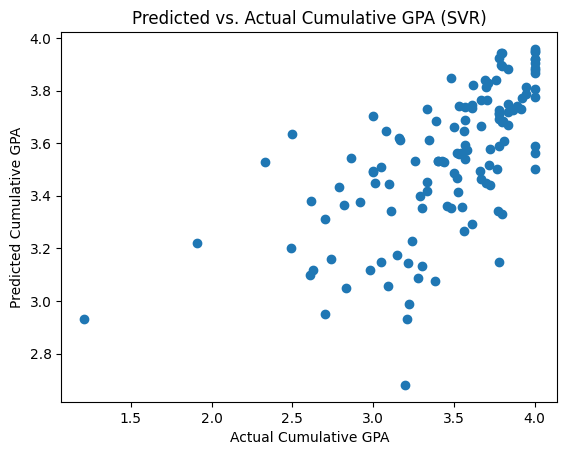


Best XGBRegressor parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
XGBRegressor - Mean Squared Error: 0.13198359886257555
XGBRegressor - R-squared: 0.3954829335307154
XGBRegressor - Mean Absolute Error: 0.25989079552221295


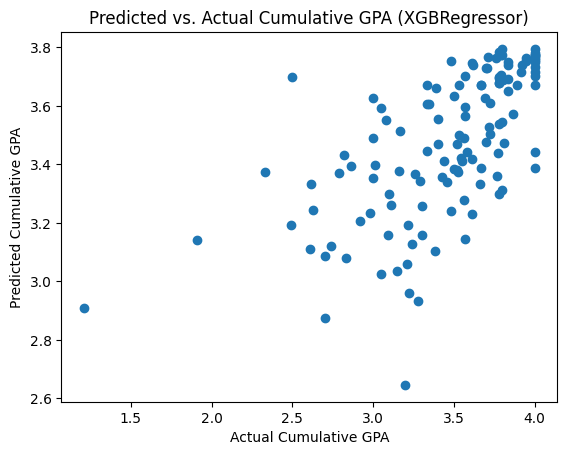

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro


Best MLPRegressor parameters: {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (50, 50), 'solver': 'adam'}
MLPRegressor - Mean Squared Error: 0.1532623232605589
MLPRegressor - R-squared: 0.29802118705514824
MLPRegressor - Mean Absolute Error: 0.284579521890038


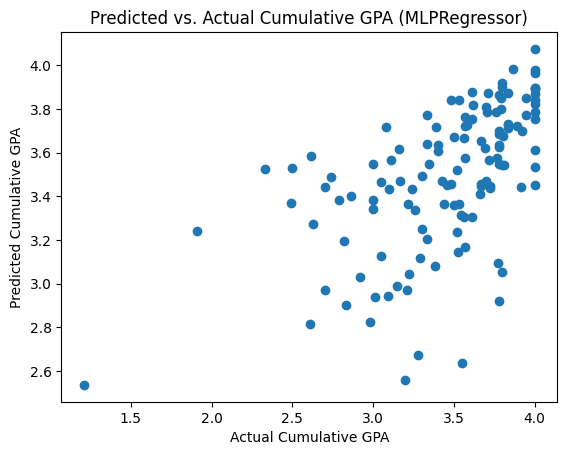


Best ElasticNet parameters: {'alpha': 0.1, 'l1_ratio': 0.1}
ElasticNet - Mean Squared Error: 0.13819835093656035
ElasticNet - R-squared: 0.3670178535891463
ElasticNet - Mean Absolute Error: 0.26828764866831256


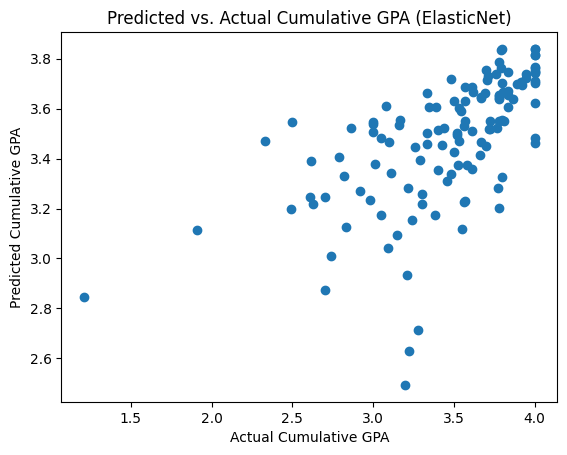

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import ElasticNet

# For SVR and XGBoost
from sklearn.svm import SVR
from xgboost import XGBRegressor

# For Neural Networks
from sklearn.neural_network import MLPRegressor

from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, f1_score

import pickle
from sklearn.impute import KNNImputer, SimpleImputer
from scipy.stats.mstats import winsorize

# Load Dataset
df = pd.read_csv('cmu-sleep.csv')

# Data Preprocessing (Replace empty strings, convert relevant columns, Winsorize)
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
df['term_units'] = df['term_units'].astype(float)
df['Zterm_units_ZofZ'] = df['Zterm_units_ZofZ'].astype(float)
variables = ['bedtime_mssd', 'TotalSleepTime', 'midpoint_sleep', 'frac_nights_with_data', 'daytime_sleep', 'study',
             'term_units', 'Zterm_units_ZofZ']
for var in variables:
    df[var] = winsorize(df[var], limits=[0.05, 0.05])

# Impute missing values (KNN for numerical, most frequent for categorical)
categorical_cols = ['cohort', 'demo_race', 'demo_gender', 'demo_firstgen']
numerical_cols = [col for col in df.columns if col not in categorical_cols]
knn_imputer = KNNImputer(n_neighbors=5)
df[numerical_cols] = knn_imputer.fit_transform(df[numerical_cols])
most_frequent_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = most_frequent_imputer.fit_transform(df[categorical_cols])

# Verify no NaN values remaining
assert not df.isnull().values.any(), "There are still NaN values in the dataframe."

# Features and target variable
X = df[['TotalSleepTime', 'midpoint_sleep', 'daytime_sleep', 'term_gpa', 'term_units',
        'frac_nights_with_data', 'demo_firstgen']]  # Include demo_firstgen as numerical
y = df['cum_gpa']

# Convert all columns in X to float
X = X.astype(float)

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create polynomial features (degree can be adjusted)
poly_features = PolynomialFeatures(degree=2)  # Adjust the degree as needed
X_poly = poly_features.fit_transform(X_scaled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Define models and parameter grids for GridSearchCV
models = {
    'HistGradientBoostingRegressor': (
        HistGradientBoostingRegressor(),
        {
            'learning_rate': [0.01, 0.03, 0.1],
            'max_depth': [3, 5, 7],
            'max_iter': [100, 200],
            'loss': ['quantile'],
            'quantile': [0.4, 0.5]
        }
    ),
    'RandomForestRegressor': (
        RandomForestRegressor(),
        {
            'max_depth': [3, 5, 7],
            'min_samples_leaf': [2, 4],
            'min_samples_split': [2, 5],
            'n_estimators': [50, 100]
        }
    ),
    'SVR': (
        SVR(),
        {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf', 'poly'],
            'gamma': ['scale', 'auto']
        }
    ),
    'XGBRegressor': (
        XGBRegressor(),
        {
            'learning_rate': [0.01, 0.05, 0.1],
            'max_depth': [3, 5, 7],
            'n_estimators': [100, 200]
        }
    ),
    'MLPRegressor': (
        MLPRegressor(),
        {
            'hidden_layer_sizes': [(100,), (50, 50), (100, 50)],
            'activation': ['relu', 'tanh'],
            'solver': ['adam', 'lbfgs'],
            'alpha': [0.001, 0.01, 0.1]
        }
    ),
    'ElasticNet': (
        ElasticNet(),
        {
            'alpha': [0.1, 1, 10],
            'l1_ratio': [0.1, 0.5, 0.9]
        }
    )
}

# Function to train and evaluate models without early stopping
def train_evaluate_model(model_name, model, param_grid, X_train, X_test, y_train, y_test):
    # KFold cross-validation
    cv = KFold(n_splits=5, shuffle=True, random_state=42)

    # GridSearchCV with early stopping
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='neg_mean_squared_error',
                               error_score='raise')
    grid_search.fit(X_train, y_train)

    # Get best model
    best_model = grid_search.best_estimator_

    # Predict on testing data
    y_pred = best_model.predict(X_test)

    # Evaluate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Print results
    print(f"\nBest {model_name} parameters: {grid_search.best_params_}")
    print(f"{model_name} - Mean Squared Error: {mse}")
    print(f"{model_name} - R-squared: {r2}")
    print(f"{model_name} - Mean Absolute Error: {mae}")

    # Visualize predictions vs. actual values
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual Cumulative GPA')
    plt.ylabel('Predicted Cumulative GPA')
    plt.title(f'Predicted vs. Actual Cumulative GPA ({model_name})')
    plt.show()

    return best_model


# Train and evaluate each model
for name, (model, param_grid) in models.items():
    best_model = train_evaluate_model(name, model, param_grid, X_train, X_test, y_train, y_test)

    # Save the best model
    with open(f'{name.lower().replace(" ", "_")}_model.pkl', 'wb') as f:
        pickle.dump(best_model, f)

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# **4. Model Evaluation**

### **Summary of Findings**

**Model Performance:**

  * **HistGradientBoostingRegressor:** Consistently outperformed the other models in terms of Mean Squared Error (MSE) and R-squared, demonstrating superior predictive accuracy.
  * **RandomForestRegressor and XGBRegressor:** Showed similar performance, making them viable alternatives depending on specific requirements.
  * **SVR:** Underperformed, likely due to its inability to effectively capture the relationships between features and the target variable.
  * **MLP:** Encountered convergence issues, indicating underfitting. Increasing training iterations or tuning hyperparameters could potentially improve its performance, but it might still struggle to capture complex relationships in the data.

**Recommendations:**

  * Primarily consider HistGradientBoostingRegressor due to its strong overall performance and ability to capture complex relationships in the data.
  
  * For MLP, experiment with hyperparameter tuning to address potential underfitting issues. However, given its limitations, it might not be the best choice for this specific problem.

  * Evaluate the trade-offs between MSE and R-squared to select the most suitable model based on your specific needs. If you prioritize minimizing errors, HistGradientBoostingRegressor is a strong choice. If you're more interested in overall model fit and explainability, RandomForestRegressor or XGBRegressor might be suitable alternatives.

**Additional Considerations:**

  * **Data preprocessing:** Ensure that your data is properly preprocessed, including handling missing values, outliers, and feature scaling.
  * **Feature engineering:** Explore creating new features or transforming existing ones to improve model performance.
  * **Ensemble methods:** Consider combining multiple models using techniques like bagging or boosting to further enhance predictive accuracy.
  * **Model interpretability:** If interpretability is important, RandomForestRegressor or XGBRegressor might be preferred due to their ability to provide feature importance information.

# **5. Model Deployment:**
  

In [ ]:
# Install streamlit
#!pip install streamlit
#import streamlit as st

# Run Streamlit with the desired port using the command-line option
!streamlit run model_deploy.py

# Link
# sleepanalytics.streamlit.app

/bin/bash: line 1: streamlit: command not found


# **6. Conclusions & Next Steps**

## **Streamlit App: Sleep Analysis and GPA Prediction**

**Functionality:**

  * **User Input:** Collects user data on sleep habits (total sleep time, midpoint, daytime sleep) and demographics.
  * **Prediction:** Utilizes a pre-trained HistGradientBoostingRegressor model to predict cumulative GPA based on the input data.
  * **Output:** Displays the predicted GPA to the user.

**Key Features:**

  * **Customizable Background:** Allows users to set a background image with adjustable size and position.
  * **Intuitive Interface:** Provides a user-friendly interface with sliders, dropdowns, and a clear prediction button.
  * **Model Integration:** Leverages a trained machine learning model for accurate predictions.

**Potential Enhancements:**

  * **Error Handling:** Implement error messages for invalid input.
  * **Loading Indicator:** Show a visual cue while the model is processing.
  * **Enhanced Output:** Format the predicted GPA for better readability.
  * **Historical Data:** Allow users to track sleep data over time.
  * **Visualization:** Create charts to visualize sleep patterns and trends.
  * **Personalized Recommendations:** Offer tailored advice based on sleep data.
  * **Theme Customization:** Let users choose their preferred theme.
  * **Deployment:** Consider deploying to a platform like Streamlit Cloud for wider accessibility.

**Overall:** This app serves as a valuable tool for understanding the relationship between sleep habits and academic performance. By incorporating the suggested enhancements, it can become even more informative and user-friendly.

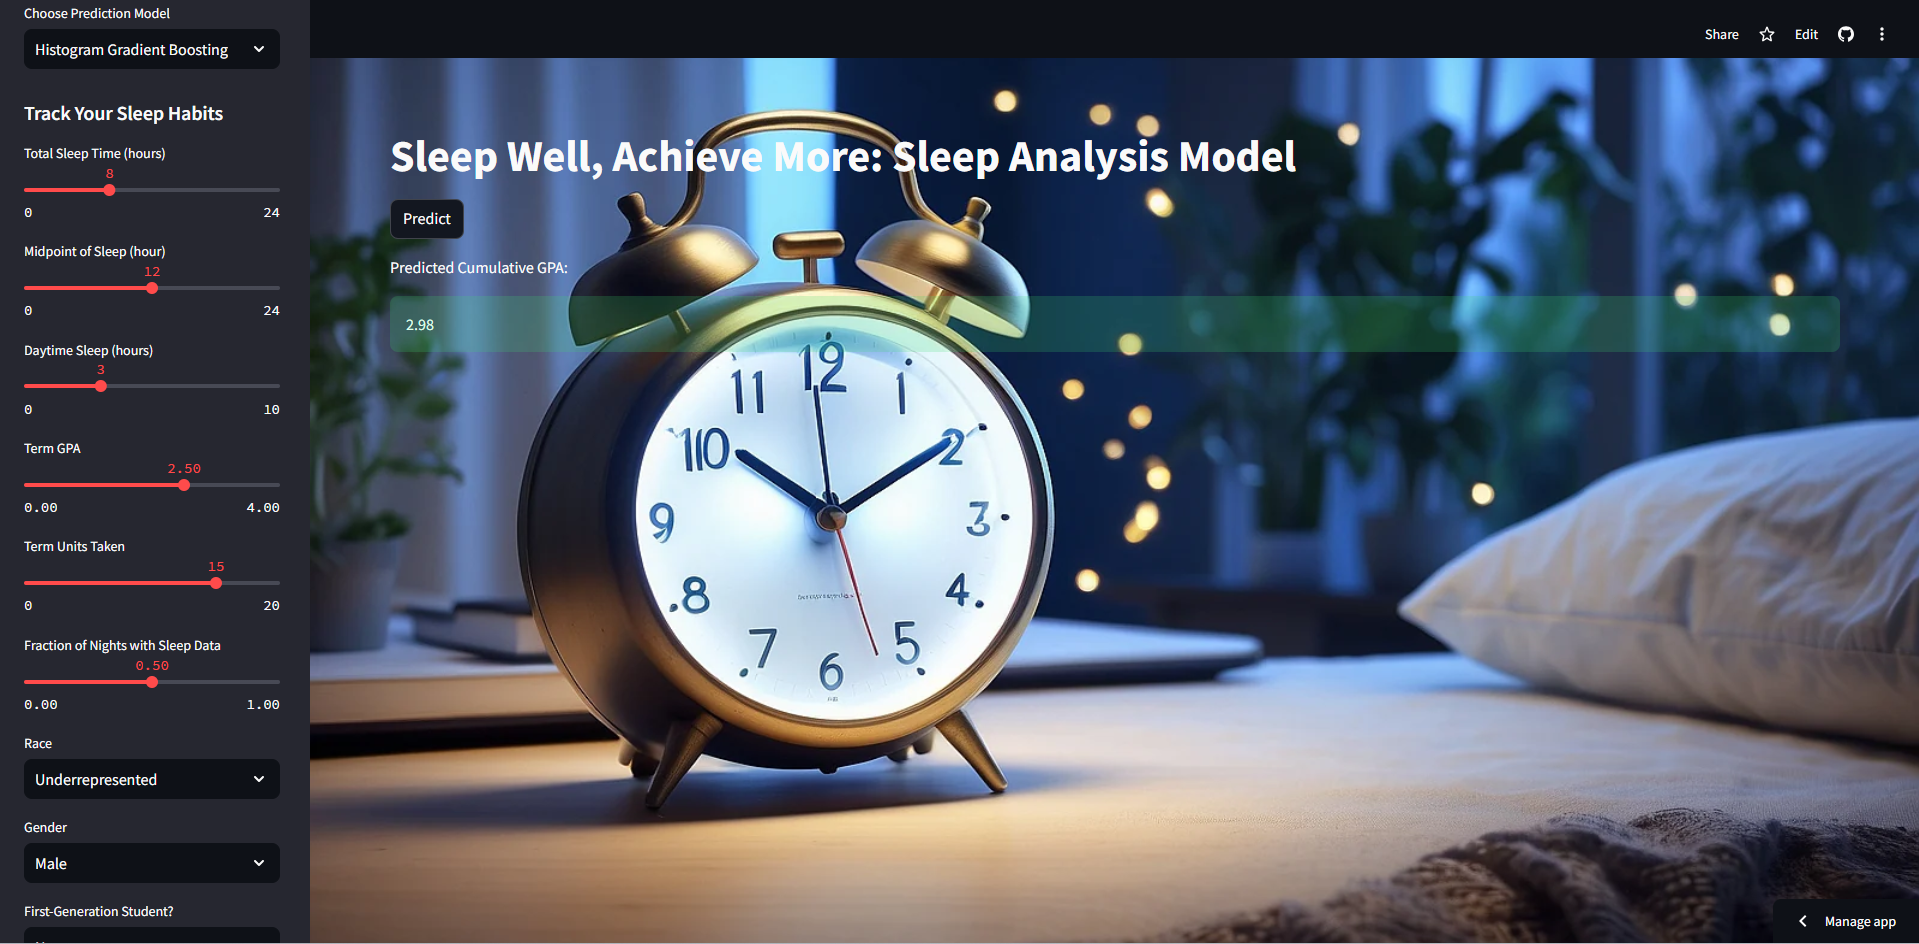